In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  4 07:02:45 2024

@author: robberto
"""

from astropy.io import fits
import matplotlib.pyplot as plt

import os
import shutil
import glob
import numpy as np
import pandas as pd
import copy
import heapq

from scipy.signal import find_peaks
import cv2

## """ Instantiate the class with the correct directory name"""

In [2]:
#data_path = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
data_path = "/Users/nestrada/Documents/SAMOS/_Run2"
from Class_SAMOS import SAMOS
SAMOS = SAMOS(data_path) 

working on the directory: /Users/nestrada/Documents/SAMOS/_Run2


### Check the files you want to process here
https://www.stsci.edu/~robberto/Main/SAMOS/Run_October2024/SAMI/QL_20241017/overview.html

## SELECT A TARGET AND INSPECT THE FILES YOU MAY WANT TO USE. ANNOTATE BELOW

In [3]:
# DATA ANALYSIS 
target_name = "ABELL3120"
target_mode  = "SAMI_manual_Mask_T00_Low_Red"

"""
=> Night 20241017
TARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]
FLATS  = target.028.fits [2s], calibration.029.fits [2s]
ARC_Ne = calibration.033.fits [10s]
ARC_HgAr = calibration.030.fits [8s]
ARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  
ARC_Ne_DMDoff = calibration.034.fits [8s]
ARC_HgAr_DMDoff = calibration.036.fits [8s]
ARC_HgArNe_DMDoff = calibration.035.fits [8s]

=> Night 20241016
BIAS =  bias.055.fits - bias.074.fits 

=> Night 20241016
FLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]
"""

'\n=> Night 20241017\nTARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]\nFLATS  = target.028.fits [2s], calibration.029.fits [2s]\nARC_Ne = calibration.033.fits [10s]\nARC_HgAr = calibration.030.fits [8s]\nARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  \nARC_Ne_DMDoff = calibration.034.fits [8s]\nARC_HgAr_DMDoff = calibration.036.fits [8s]\nARC_HgArNe_DMDoff = calibration.035.fits [8s]\n\n=> Night 20241016\nBIAS =  bias.055.fits - bias.074.fits \n\n=> Night 20241016\nFLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]\n'

In [4]:
#CREATE A WORKING DIRECTORY WITH THE TARGET NAME IF IT DOES NOT EXIST
#analysis_top_directory ="/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS"
analysis_top_directory ="/Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01"
working_directory = os.path.join(analysis_top_directory,target_name,target_mode)

# if the folder already exists in new directory
if not os.path.exists(working_directory):
        os.makedirs(working_directory)
os.chdir(working_directory) 
print(working_directory)

#DATA DIRECTORIES WHERE THE SAMOS FILES ARE STORED
data_directory = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
data_directory_17 = data_directory + "/20241017"
data_directory_16 = data_directory + "/20241016"
data_directory_09 = data_directory + "/20241009"

/Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red


In [5]:
#first we define a function that finds the edges of a 1-d vector
def find_edges(data):
    threshold = (max(data)-min(data))/5  
    gradient = [data[i] - data[i-1] for i in range(1, len(data))]
    edges = [i for i, grad in enumerate(gradient) if abs(grad) > threshold]
    return edges

In [6]:
for i_s in range(14):

    #READ THE FITS FILE
    #====================================================================================
    fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
    
    hdul = fits.open(fits_file)
    hdr = hdul[0].header
    hdul.info()


Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 Ima

## LOOP OVER ALL MASKS

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =   

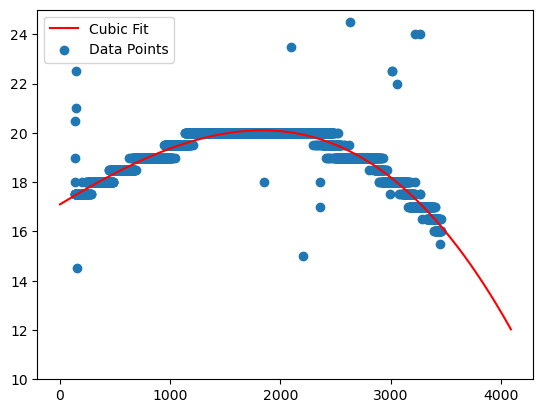

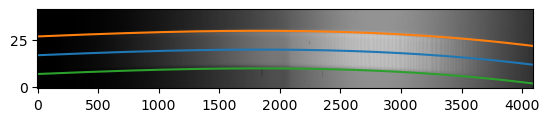

(42, 4094)


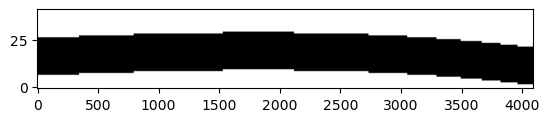

0 (42, 4094)


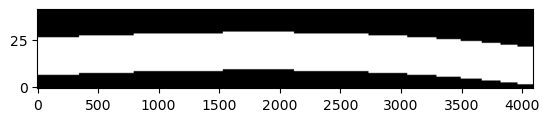

(42, 4094)
(42, 4094)


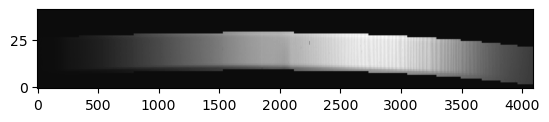

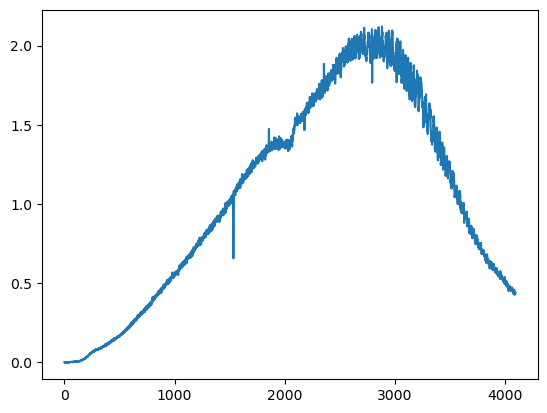

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


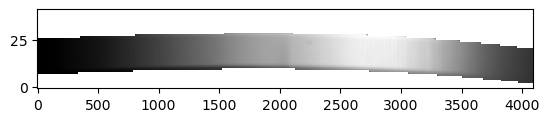

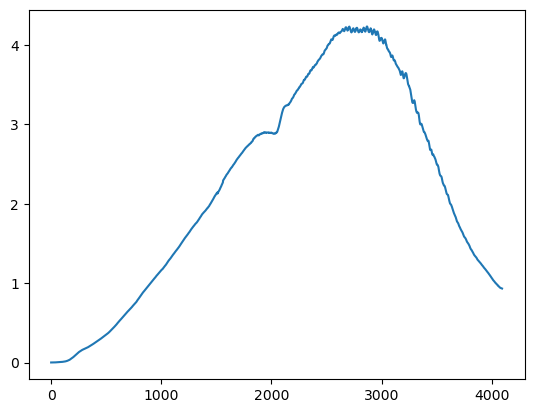

(42, 4094)
(42, 4094)


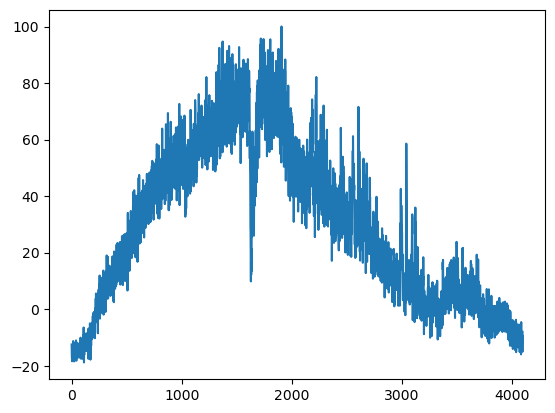

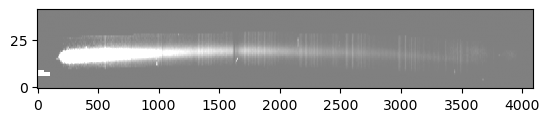

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          2.11373005  0.2101878   7.63791475  7.27423402
 13.63092846 19.44093702 17.03473156 14.60991779  6.18980685  6.28074781
  1.51277438  0.28763093  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


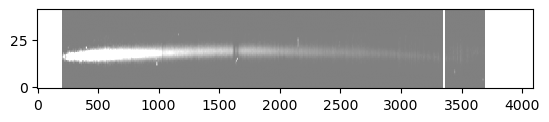

(84, 4094) (84, 4094)


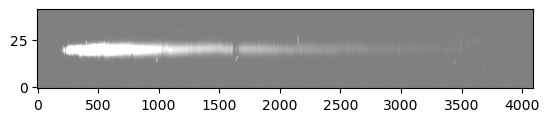

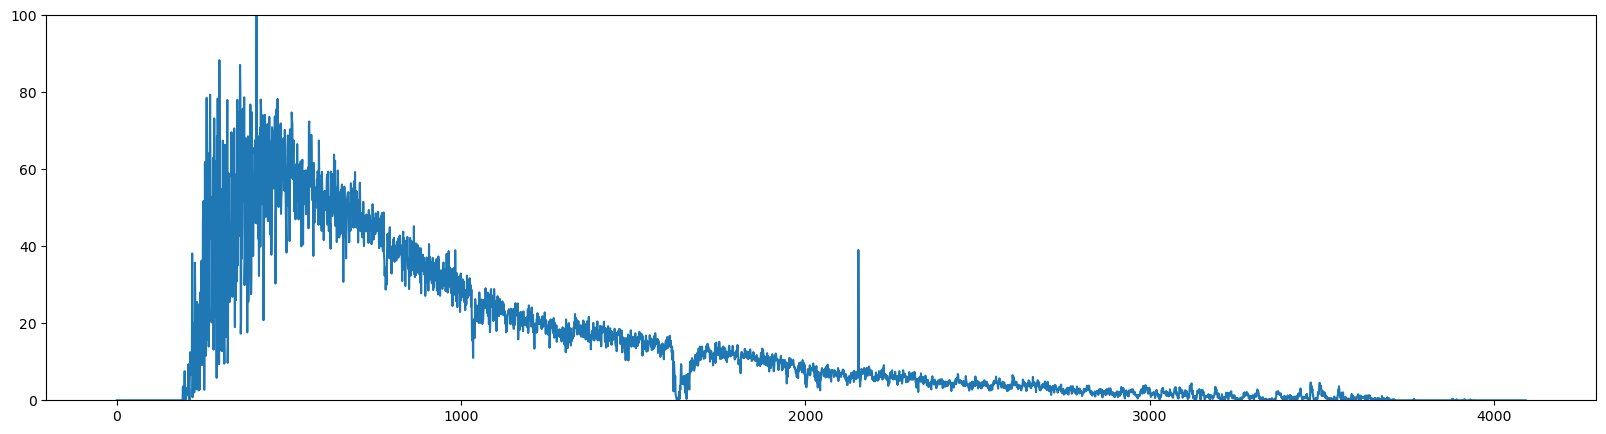

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

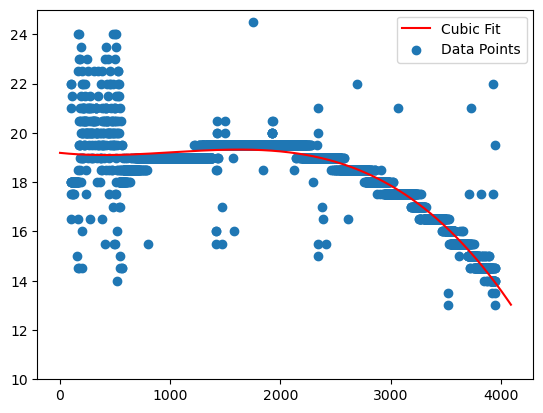

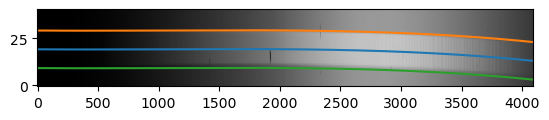

(41, 4094)


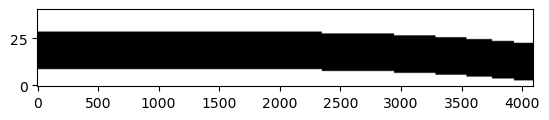

1 (41, 4094)


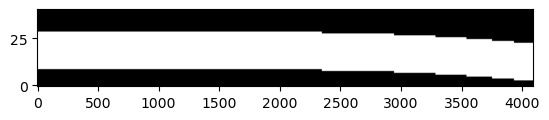

(41, 4094)
(41, 4094)


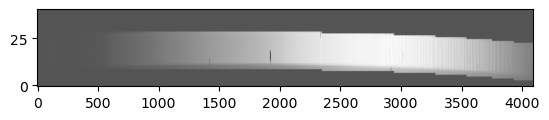

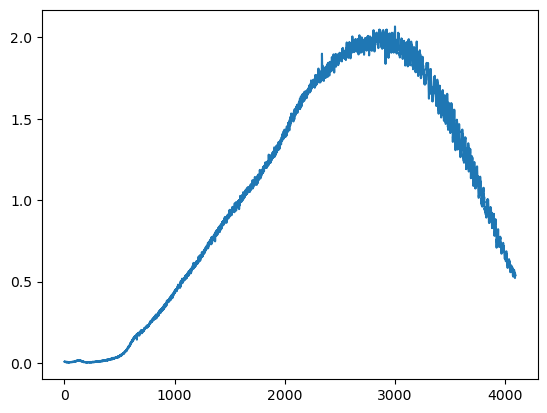

(41, 4094)
(41, 4094)
(41, 4094) (41, 4094)


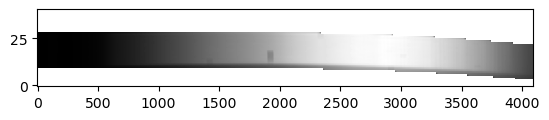

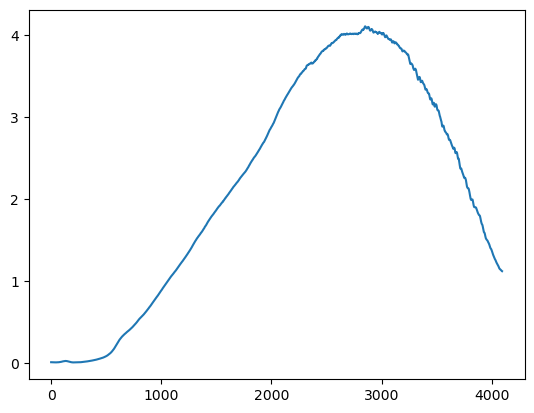

(41, 4094)
(41, 4094)


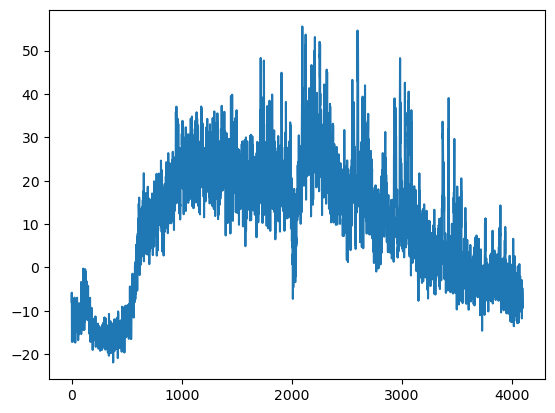

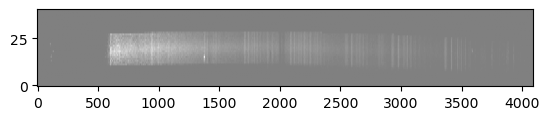

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.99080789e+00 4.23217997e-03 3.61181962e+00 2.53470872e+00
 2.97809729e+00 1.09722067e+00 5.55432014e+00 4.28418990e+00
 2.32785230e+00 3.97190338e+00 3.12642010e+00 1.78800847e+00
 2.70159577e+00 0.00000000e+00 2.91787700e+00 3.95689187e-01
 7.36413932e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


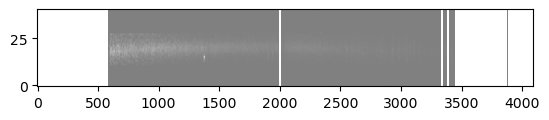

(82, 4094) (82, 4094)


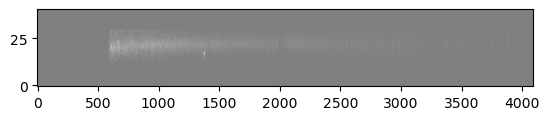

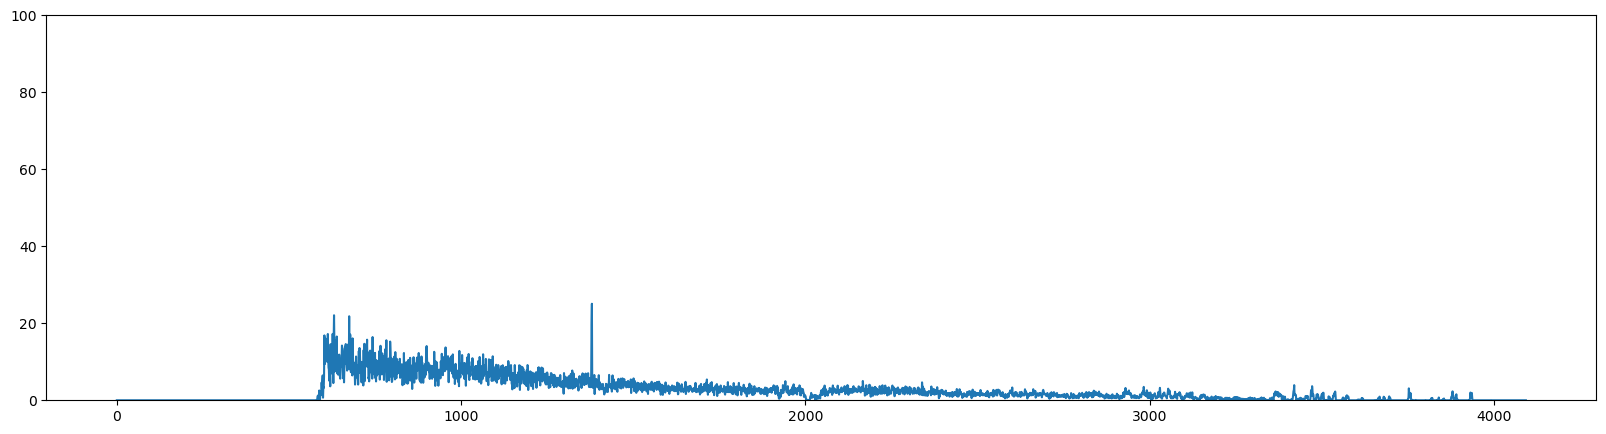

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 41)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 41)   float64   
  3  LINES         1 ImageHDU         8   (4094, 41)   float64   
  4  MASK          1 ImageHDU         8   (4094, 41)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 41)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 41)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 41)   float6

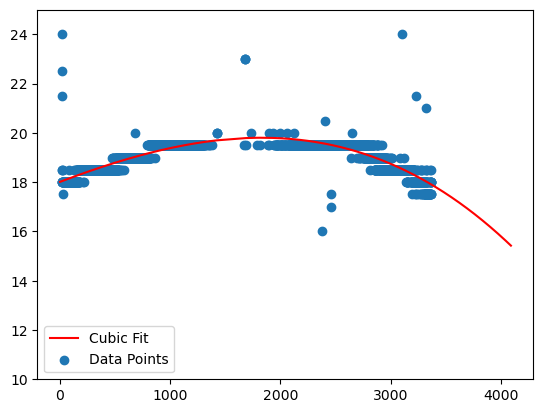

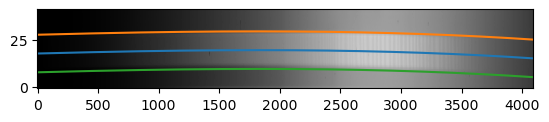

(42, 4094)


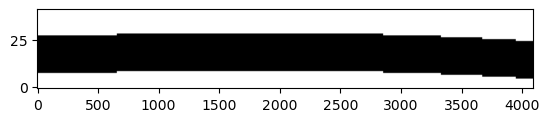

2 (42, 4094)


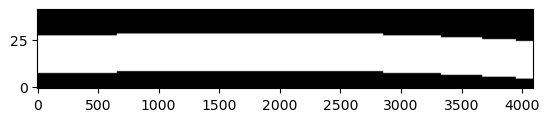

(42, 4094)
(42, 4094)


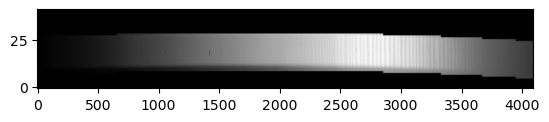

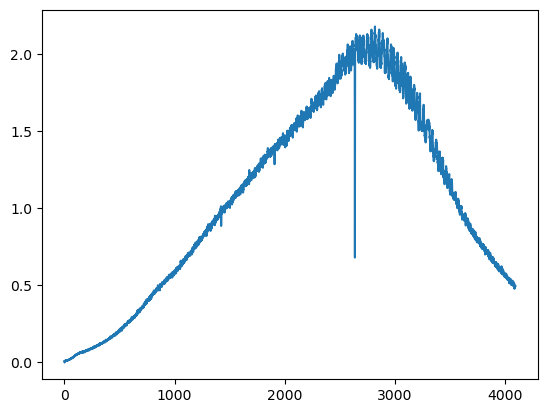

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


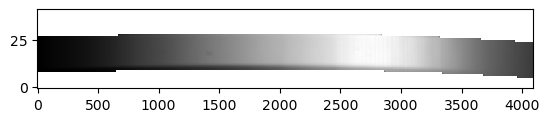

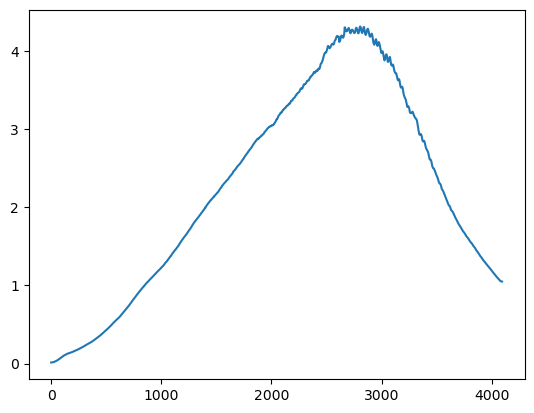

(42, 4094)
(42, 4094)


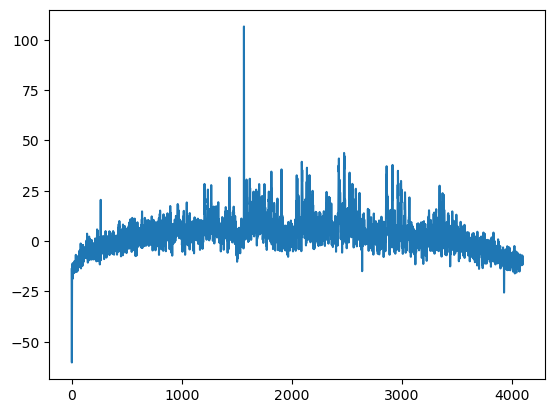

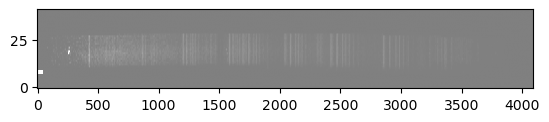

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.83037403 1.69882897 0.0877546  0.
 0.         0.         0.         1.02912313 0.10218298 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


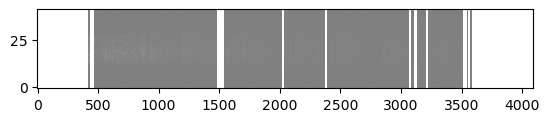

(84, 4094) (84, 4094)


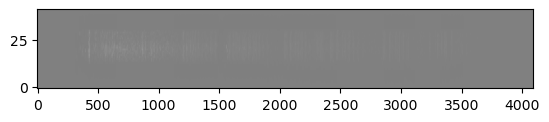

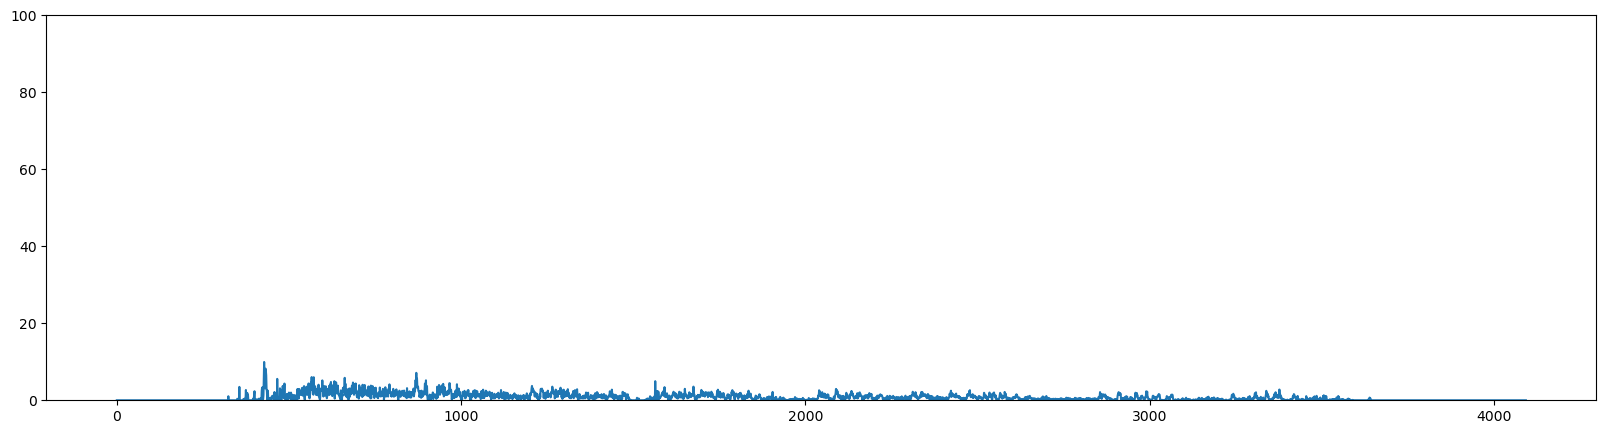

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

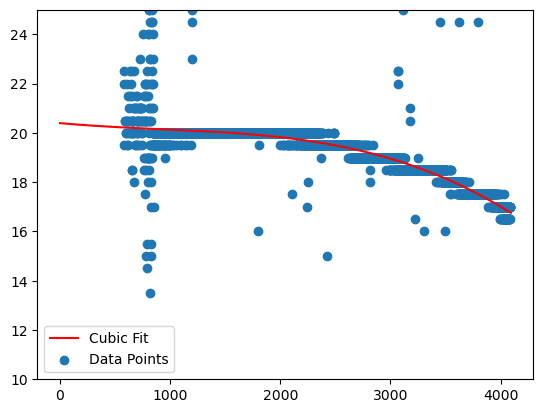

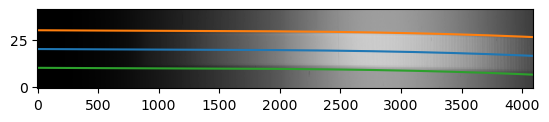

(42, 4094)


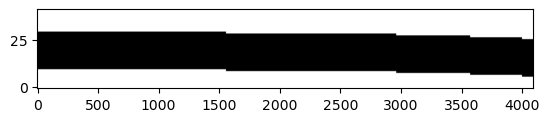

3 (42, 4094)


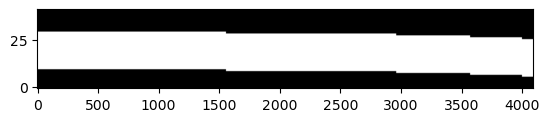

(42, 4094)
(42, 4094)


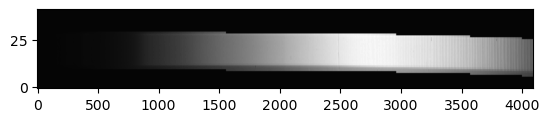

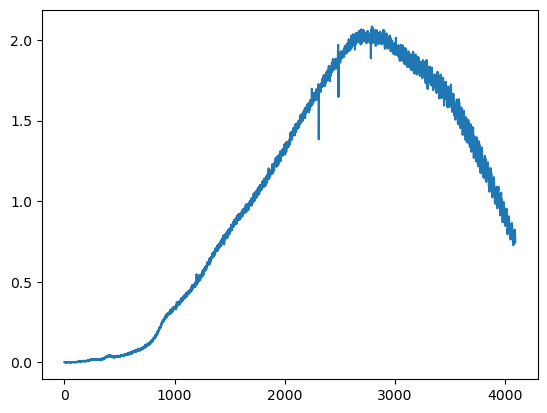

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


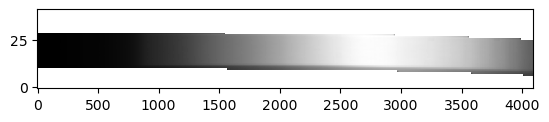

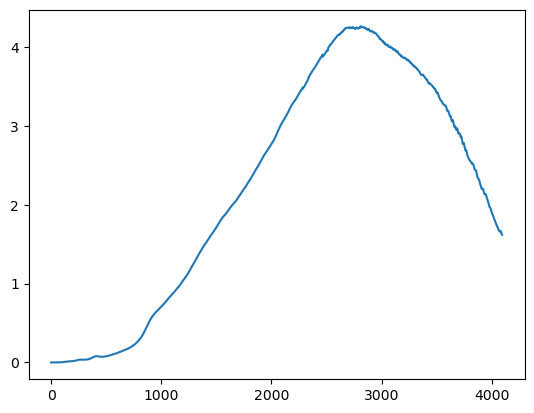

(42, 4094)
(42, 4094)


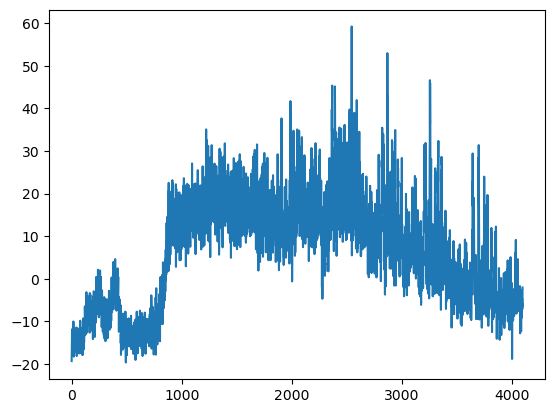

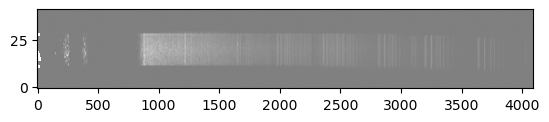

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.09197284 1.35437072 2.51631648 4.1001542  1.89693811 0.97364548
 4.36262398 5.4765057  3.96765631 5.70383404 5.31603329 4.44125655
 5.69273903 5.59202807 0.30564007 3.79824503 2.85408896 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


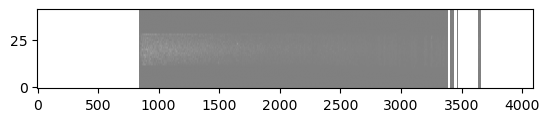

(84, 4094) (84, 4094)


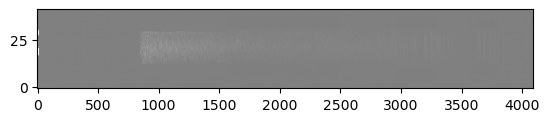

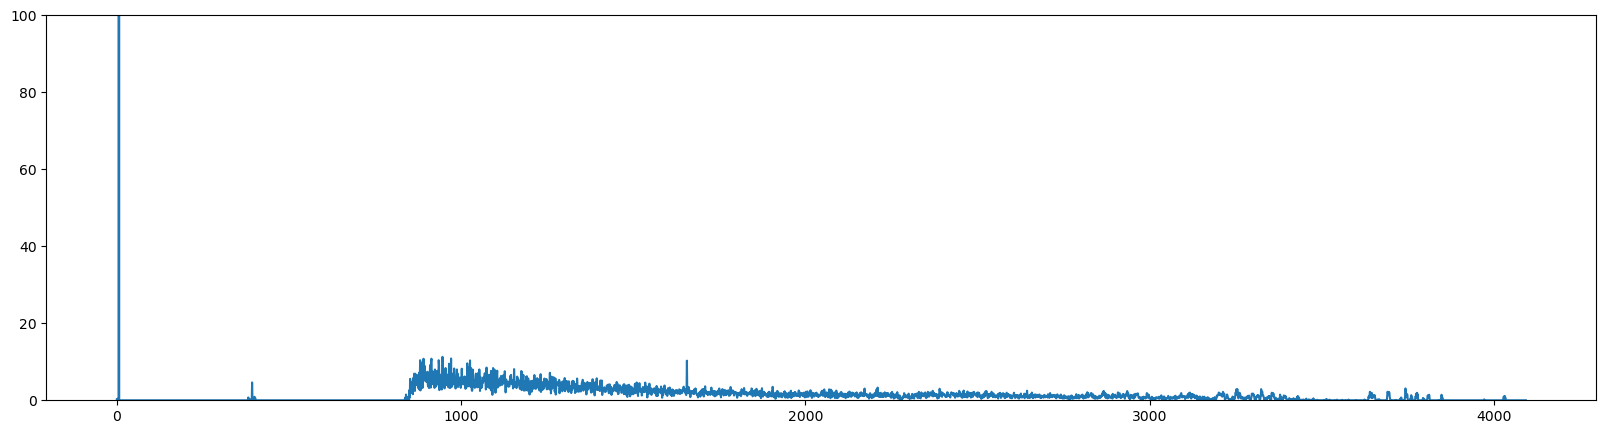

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

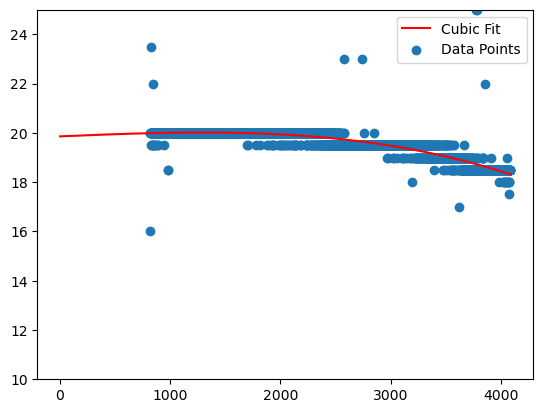

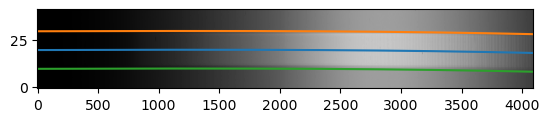

(42, 4094)


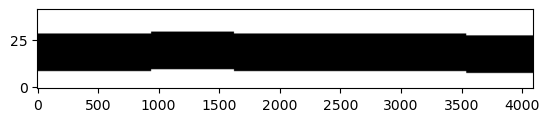

4 (42, 4094)


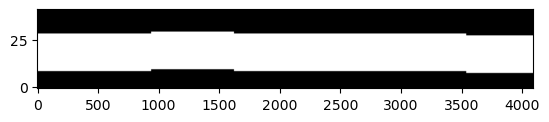

(42, 4094)
(42, 4094)


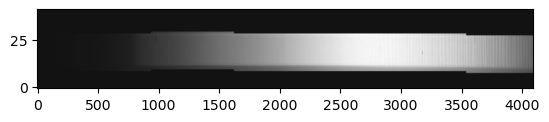

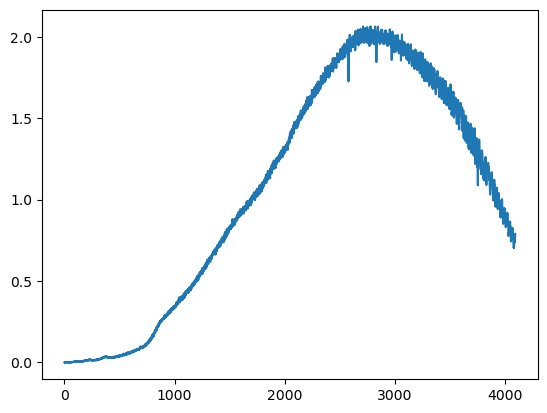

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


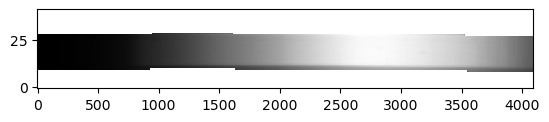

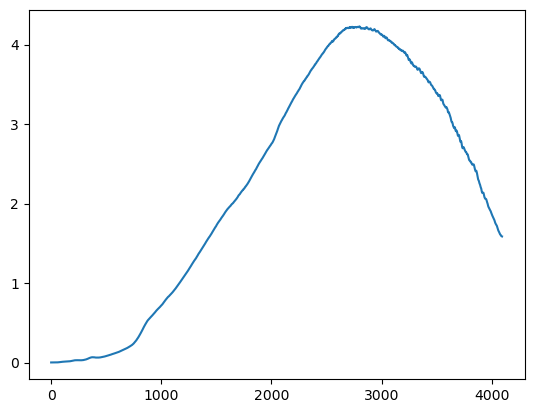

(42, 4094)
(42, 4094)


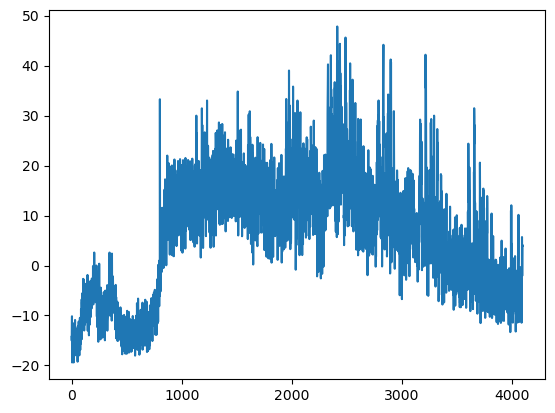

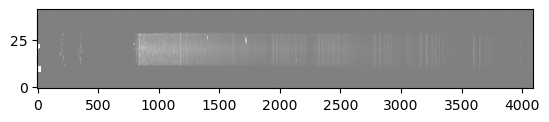

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05926484 0.         0.
 4.43972584 2.37694644 2.63443869 2.92393305 4.32807351 6.88043295
 4.22402424 6.86661407 3.48508764 3.48240424 8.89218016 3.76735678
 1.83379344 4.95593904 3.00637682 4.5682926  0.60067818 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


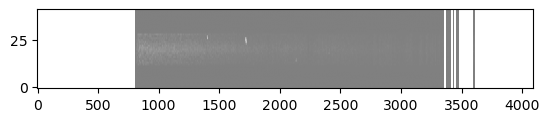

(84, 4094) (84, 4094)


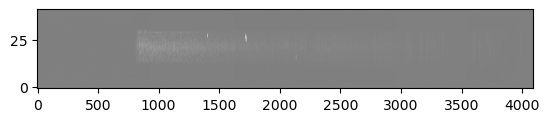

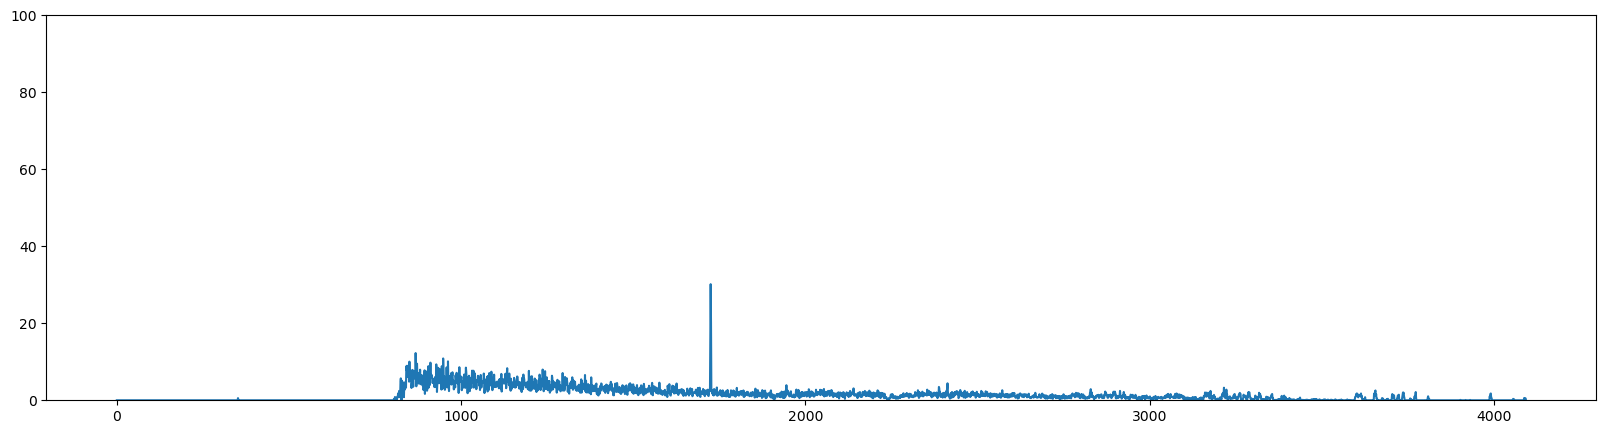

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

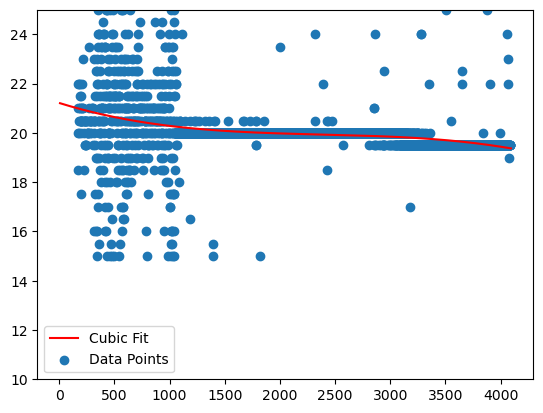

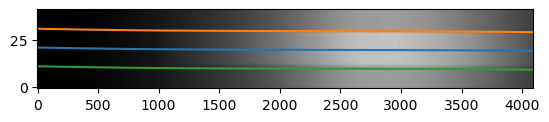

(42, 4094)


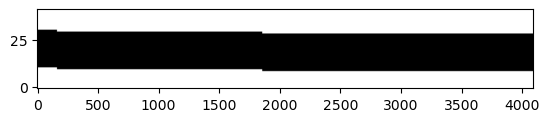

5 (42, 4094)


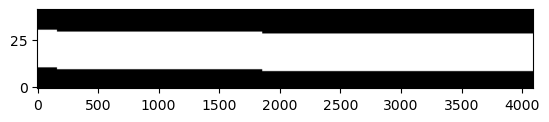

(42, 4094)
(42, 4094)


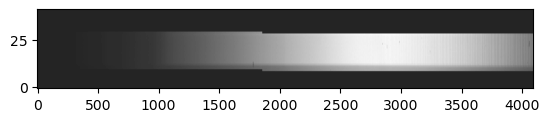

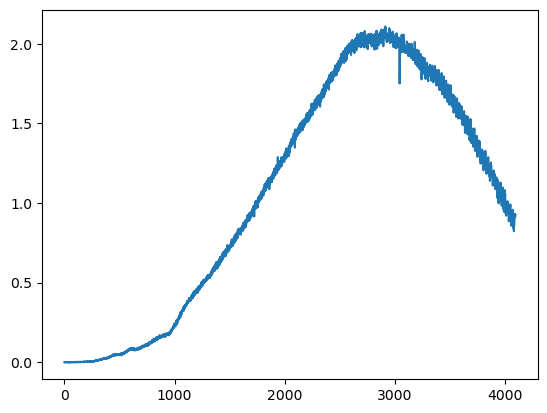

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


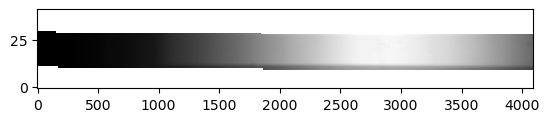

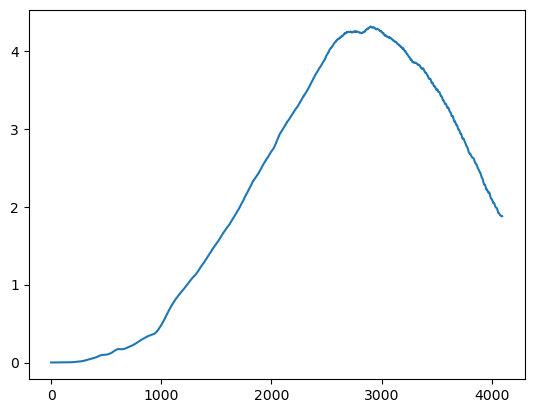

(42, 4094)
(42, 4094)


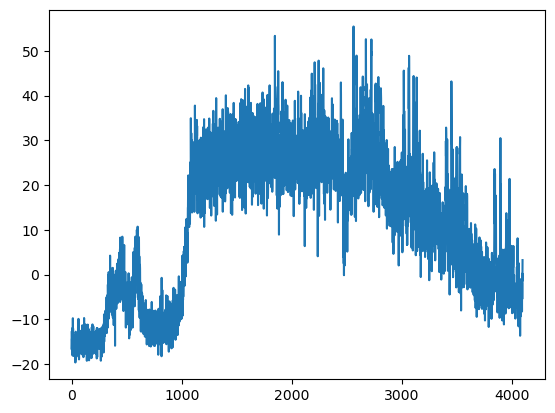

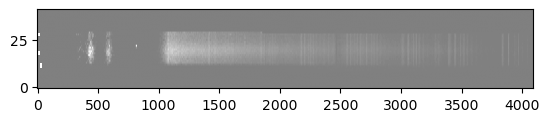

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.34520068  2.22583218  5.79823355  5.77381714  5.42170175
 10.08580636  8.44221281  6.4670033  10.51738098  7.18674023  7.17685672
  4.52693783  2.90089771  5.54059044  5.34168708  2.08274472  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


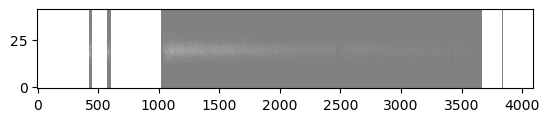

(84, 4094) (84, 4094)


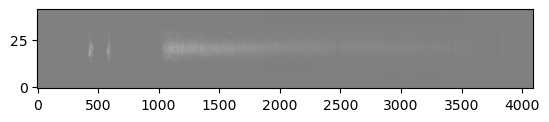

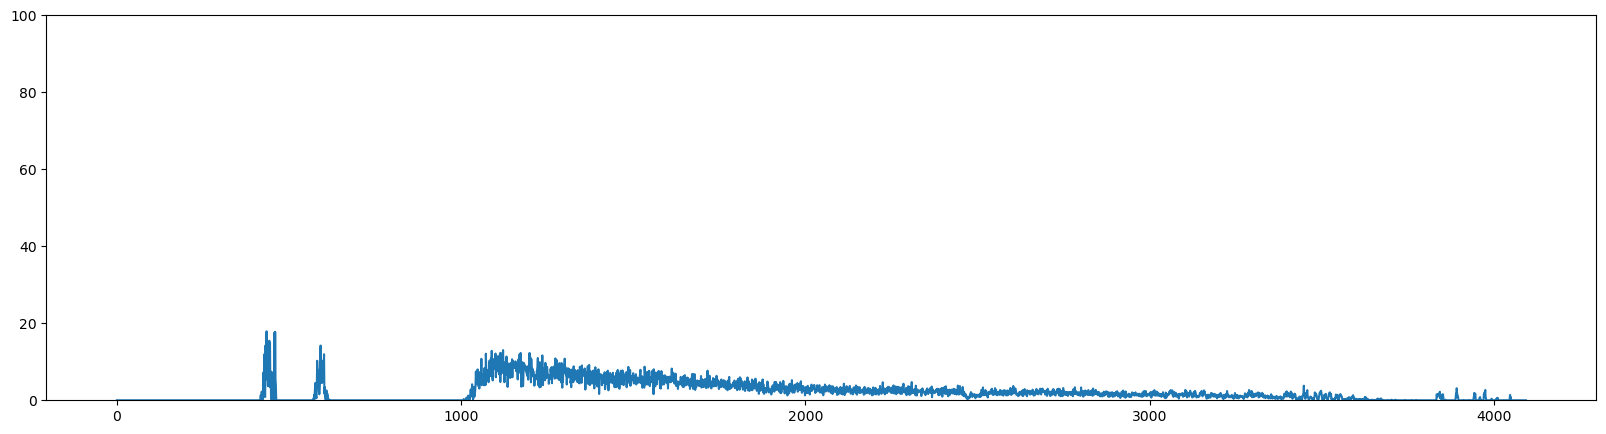

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

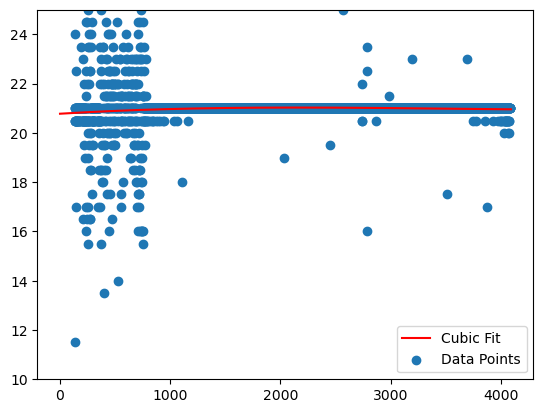

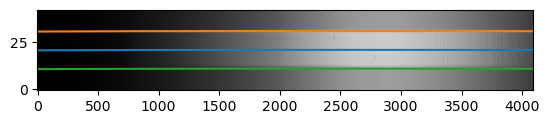

(43, 4094)


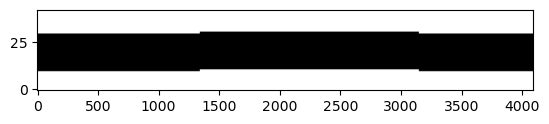

6 (43, 4094)


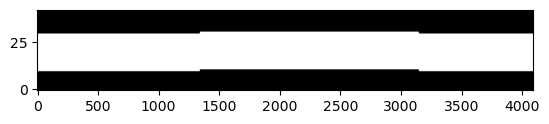

(43, 4094)
(43, 4094)


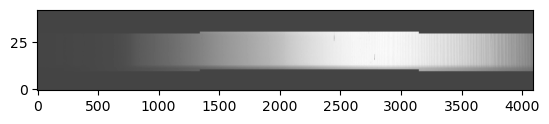

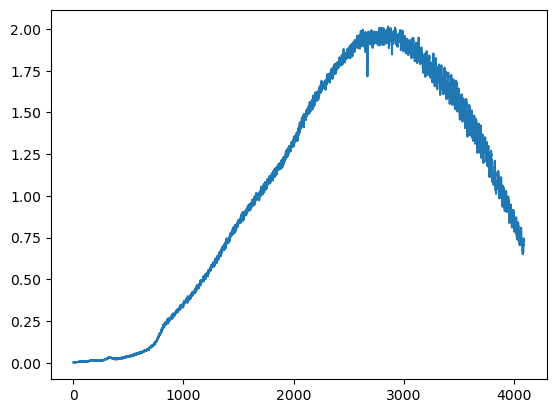

(43, 4094)
(43, 4094)
(43, 4094) (43, 4094)


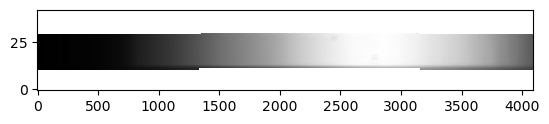

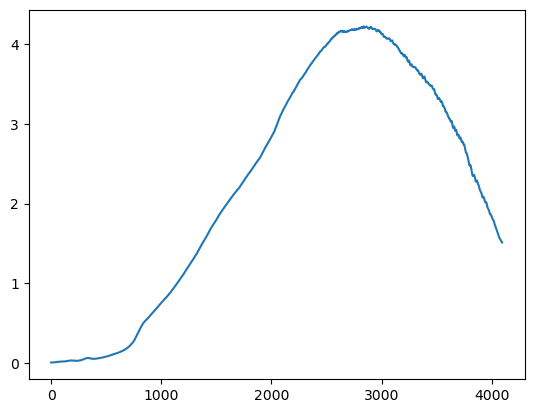

(43, 4094)
(43, 4094)


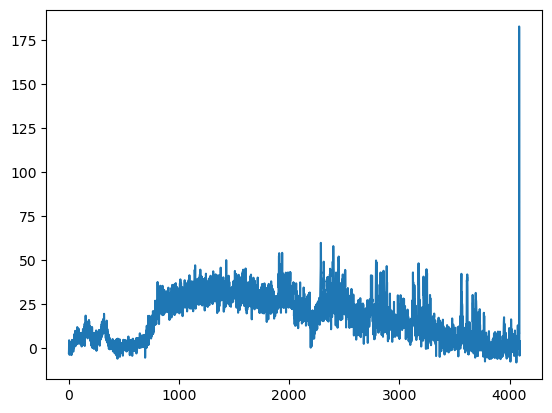

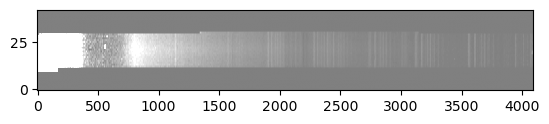

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 11.98051638  7.28672435  7.90429724 11.7102633   7.48344139 10.71207703
 10.89861028 12.18629494 10.95958114 10.78049422 11.18111517  8.35647259
  9.04673036  8.80171508  9.39223305 10.39505752  7.67660011  7.78137699
  7.50804965  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


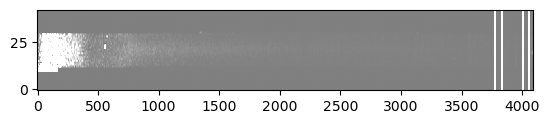

(86, 4094) (86, 4094)


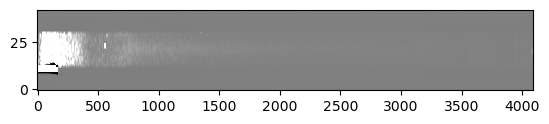

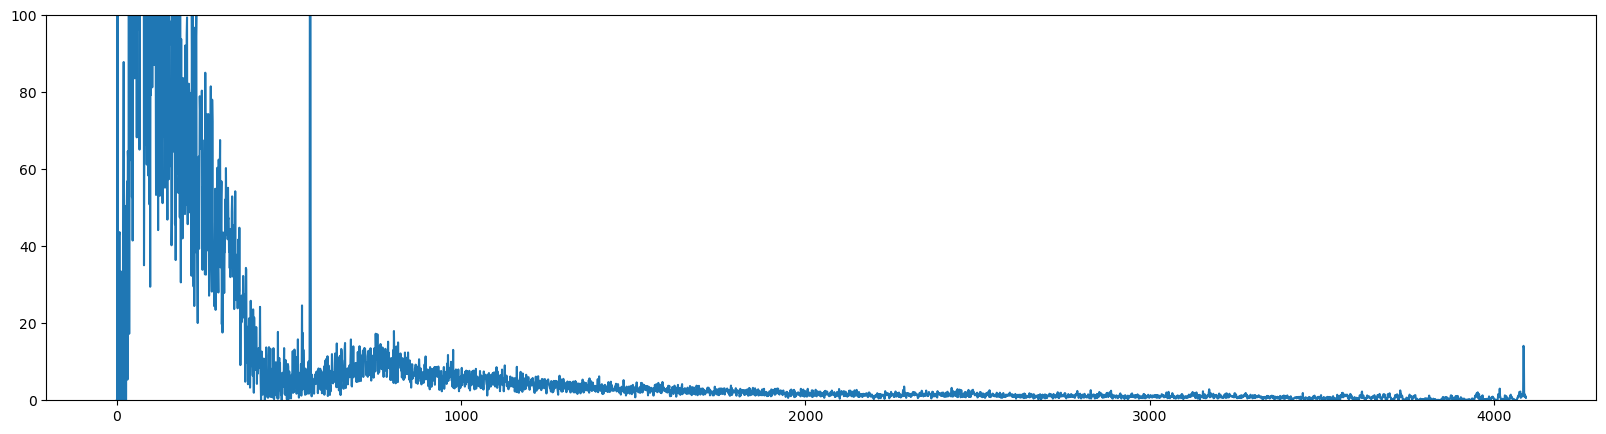

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 43)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 43)   float64   
  3  LINES         1 ImageHDU         8   (4094, 43)   float64   
  4  MASK          1 ImageHDU         8   (4094, 43)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 43)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 43)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 43)   float6

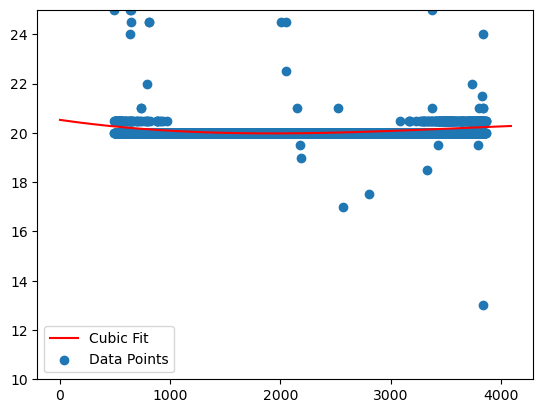

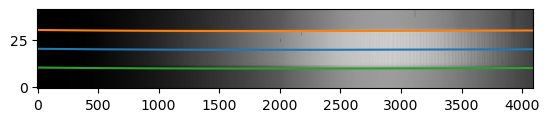

(42, 4094)


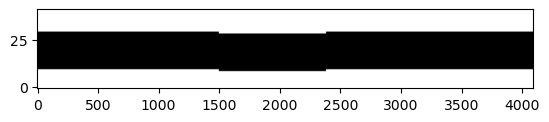

7 (42, 4094)


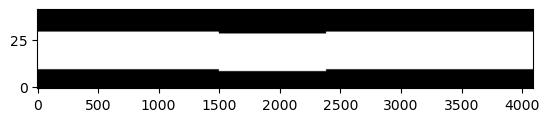

(42, 4094)
(42, 4094)


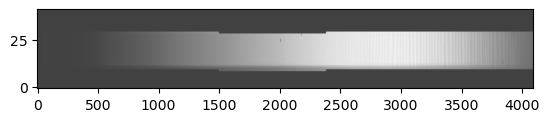

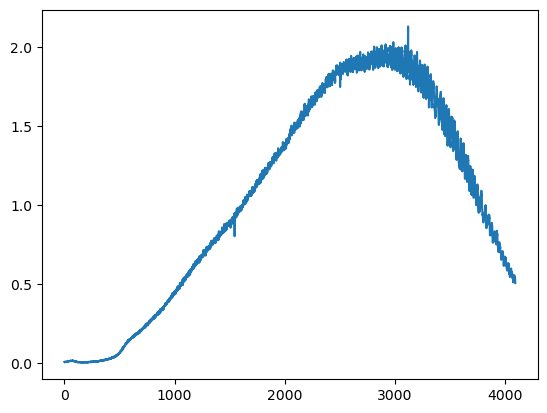

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


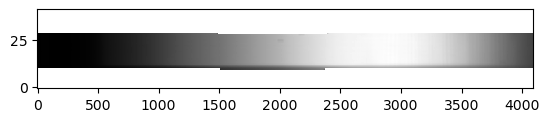

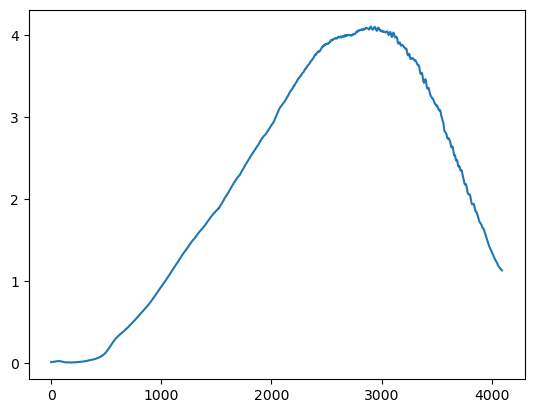

(42, 4094)
(42, 4094)


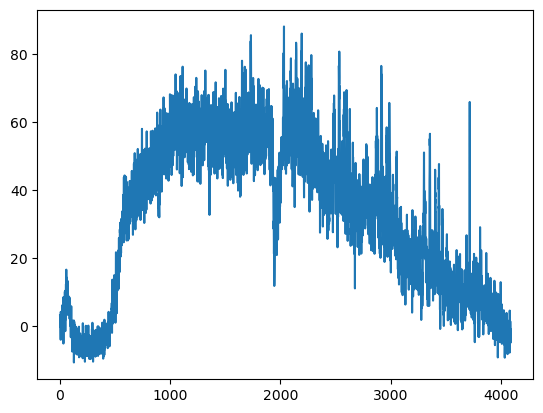

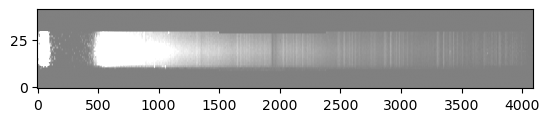

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          3.65997352  6.10425879  8.5231108
 10.32286656 13.37326762 12.05737805 15.54661045 12.91193417 16.15565002
 15.16341135 18.08548535 15.42291587 18.34652278 14.72709009 13.64450541
 15.98368462 12.30324971 10.75395919  9.42359804  8.92201958  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


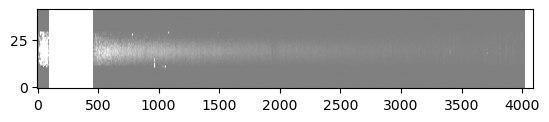

(84, 4094) (84, 4094)


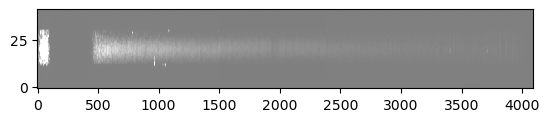

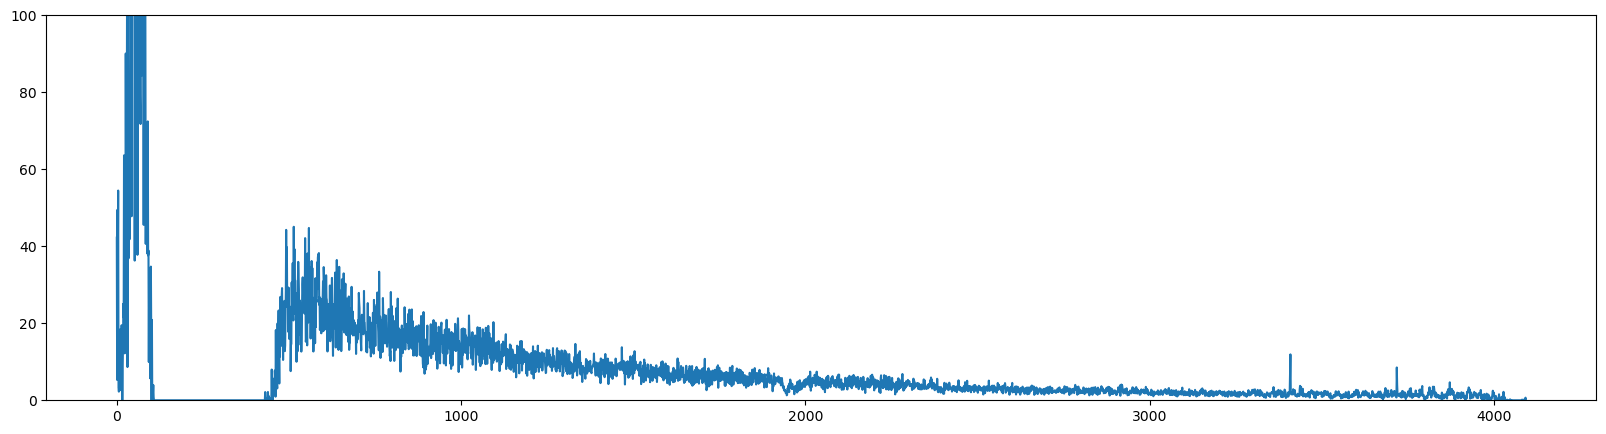

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

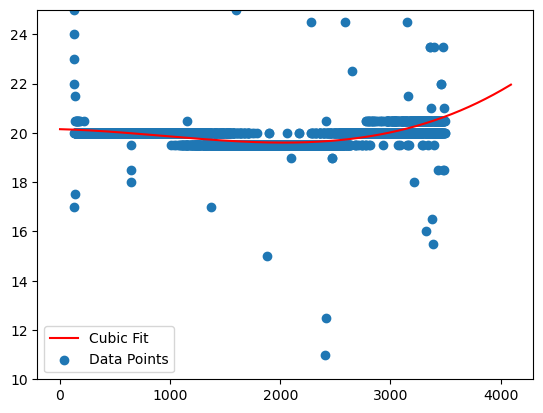

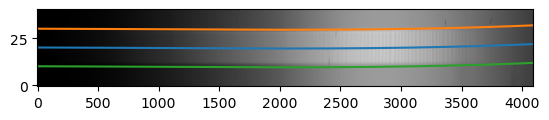

(41, 4094)


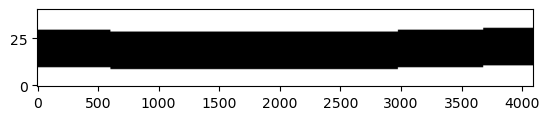

8 (41, 4094)


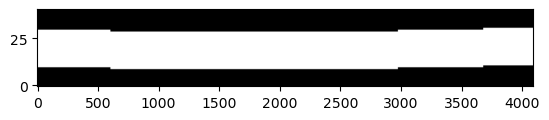

(41, 4094)
(41, 4094)


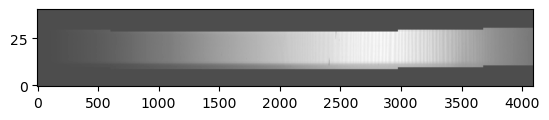

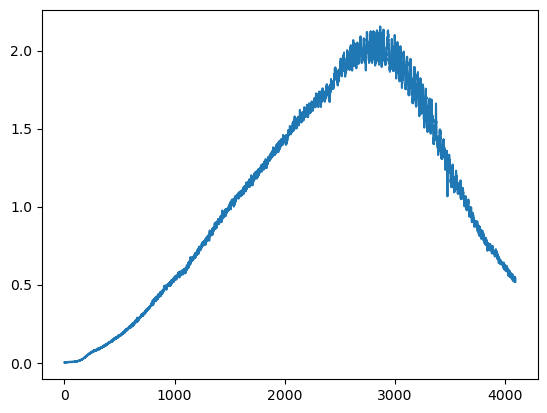

(41, 4094)
(41, 4094)
(41, 4094) (41, 4094)


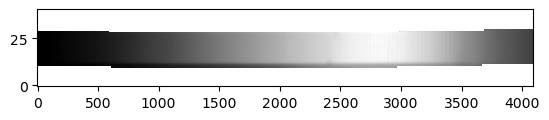

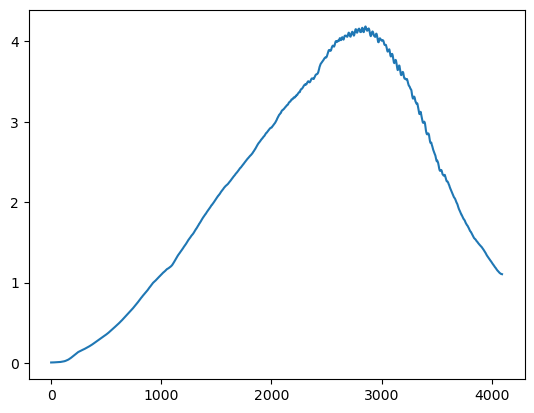

(41, 4094)
(41, 4094)


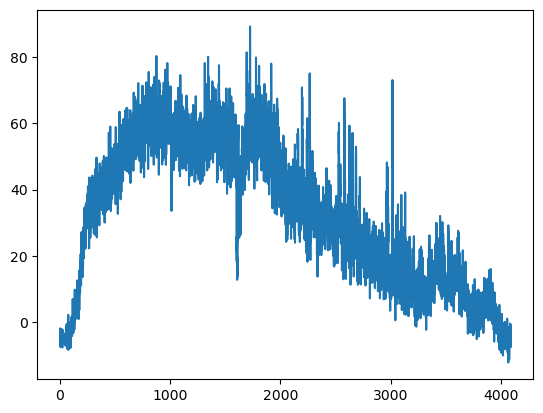

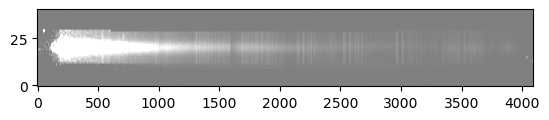

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          5.67358448  1.03977173
  1.73700444  6.1848316   3.35030517  4.81579094  6.87918958  7.1092726
  9.32200147 15.97379223 12.59302705 14.26220691 12.49164327  4.98238006
  5.88340175  6.04885409  3.76165637  2.93734036  3.5864404   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


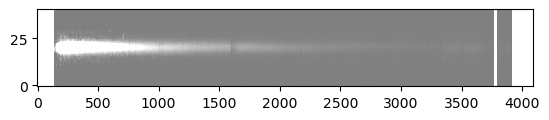

(82, 4094) (82, 4094)


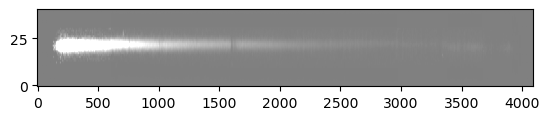

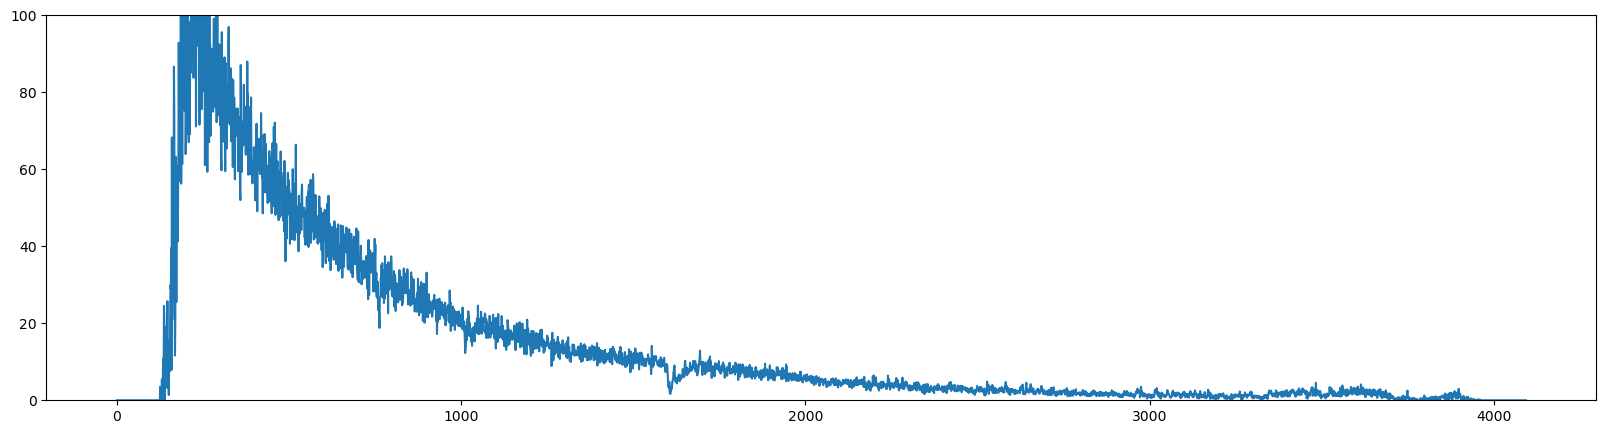

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 41)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 41)   float64   
  3  LINES         1 ImageHDU         8   (4094, 41)   float64   
  4  MASK          1 ImageHDU         8   (4094, 41)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 41)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 41)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 41)   float6

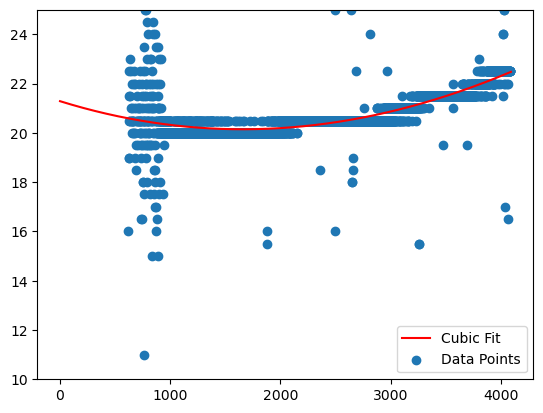

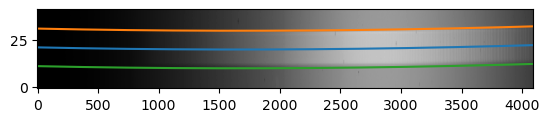

(42, 4094)


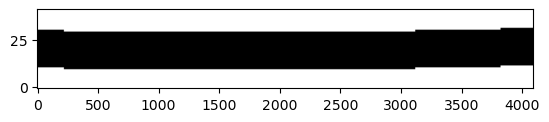

9 (42, 4094)


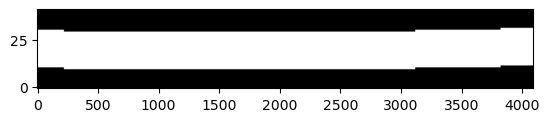

(42, 4094)
(42, 4094)


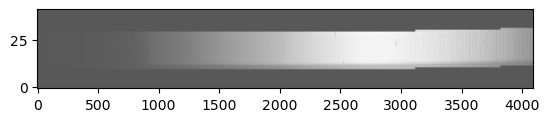

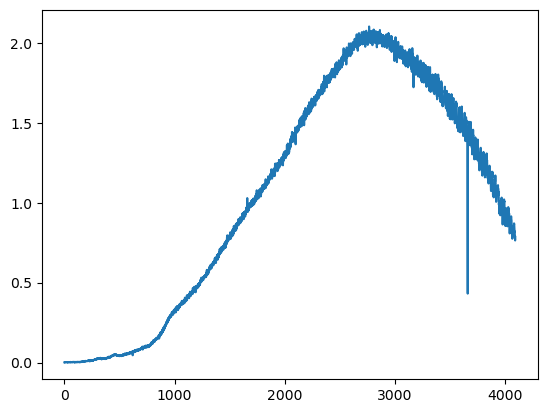

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


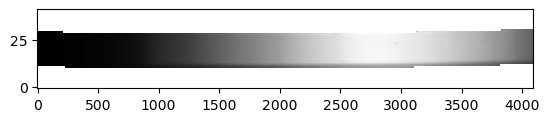

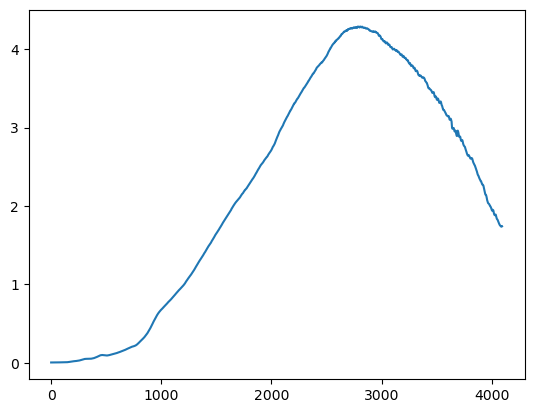

(42, 4094)
(42, 4094)


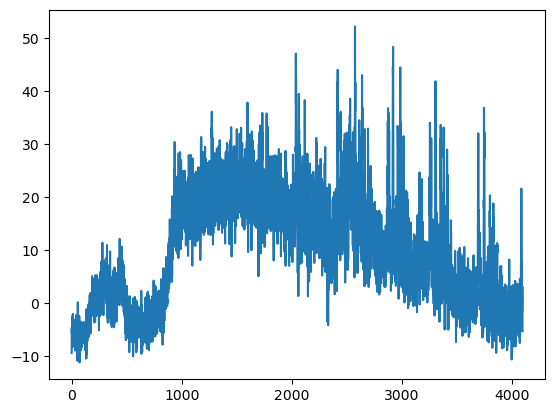

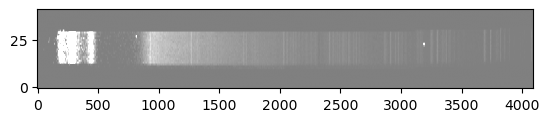

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.24670776 1.58821215
 1.33164922 5.73193528 2.74223398 6.79093834 9.71189513 5.93863477
 6.82781682 5.8062455  5.44312971 5.86726478 7.61639995 6.20400467
 7.18975984 5.83546851 4.53236328 7.34533871 5.19900134 3.30782027
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


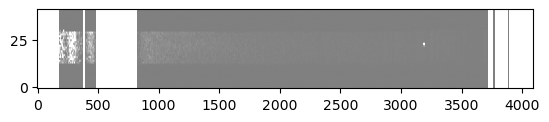

(84, 4094) (84, 4094)


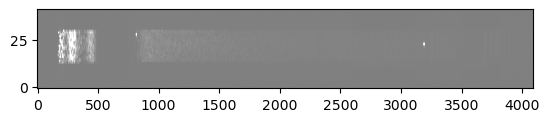

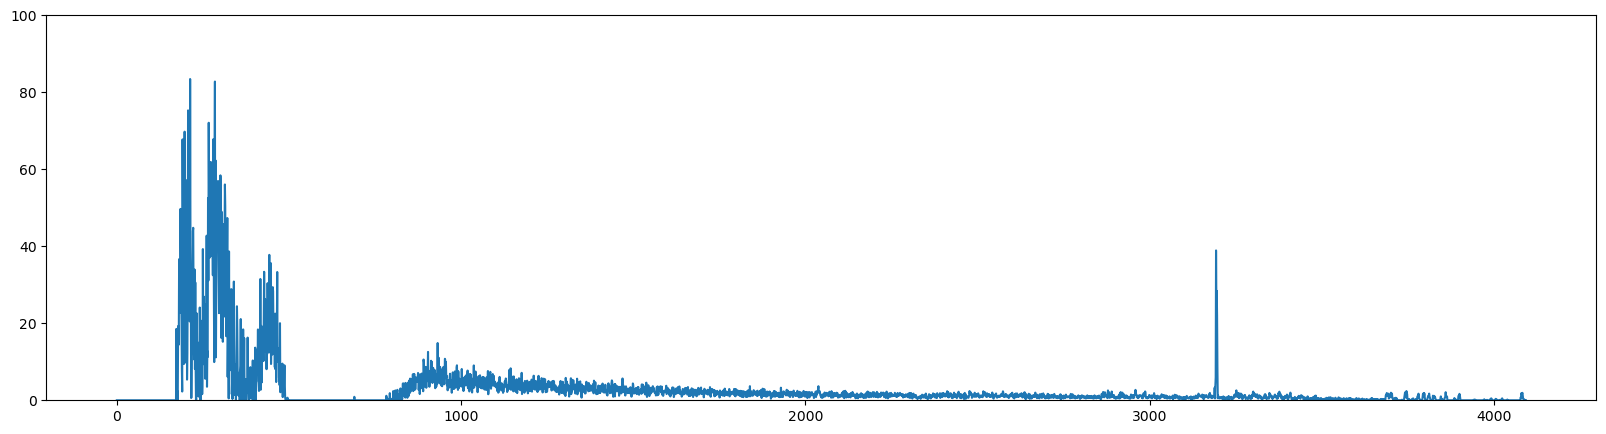

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

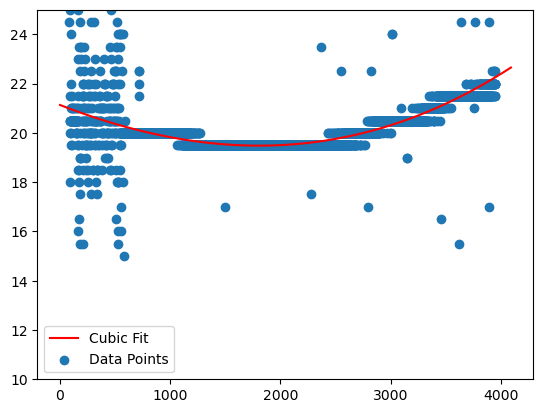

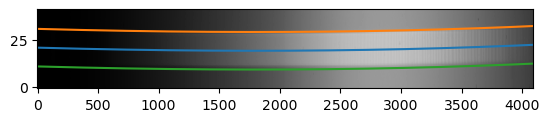

(42, 4094)


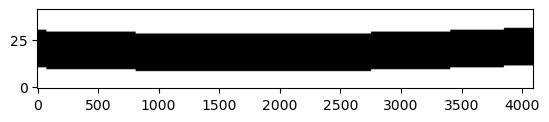

10 (42, 4094)


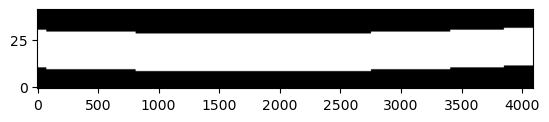

(42, 4094)
(42, 4094)


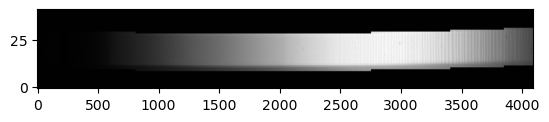

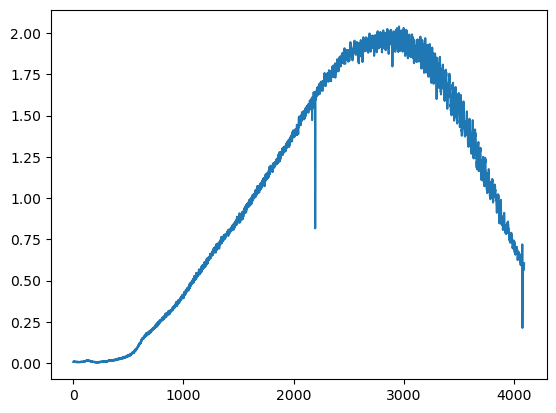

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


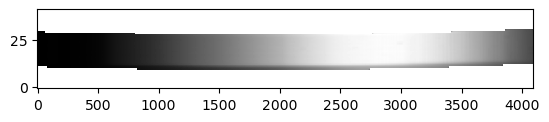

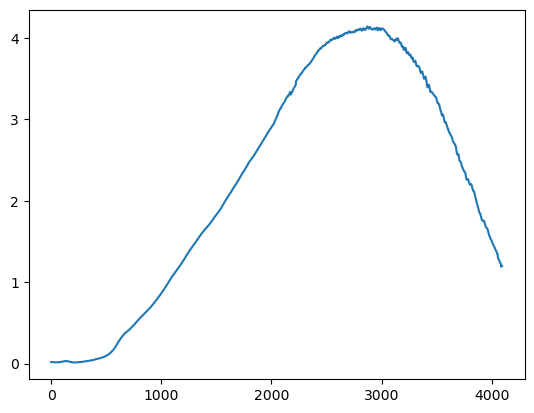

(42, 4094)
(42, 4094)


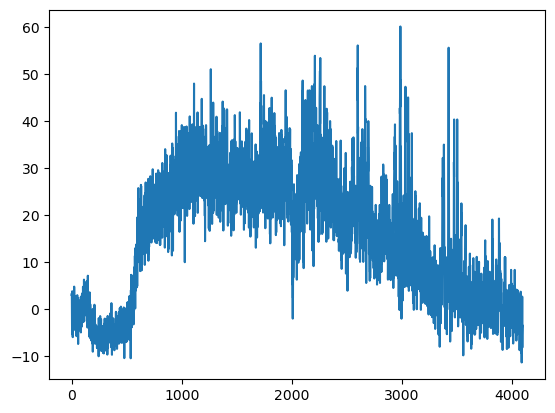

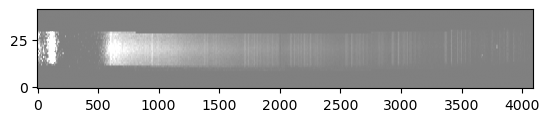

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         7.33191908 2.74432365 0.6055022
 5.20946582 4.49921794 4.12075476 4.46228272 4.52870964 3.11157174
 4.87635189 4.77364017 6.39810929 8.34791351 7.55891618 4.32607587
 5.6773048  4.12141416 4.04717446 3.09652853 4.75551503 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


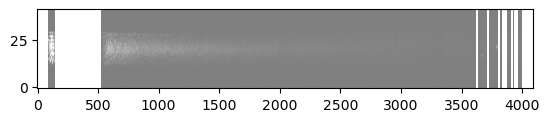

(84, 4094) (84, 4094)


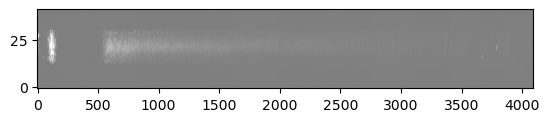

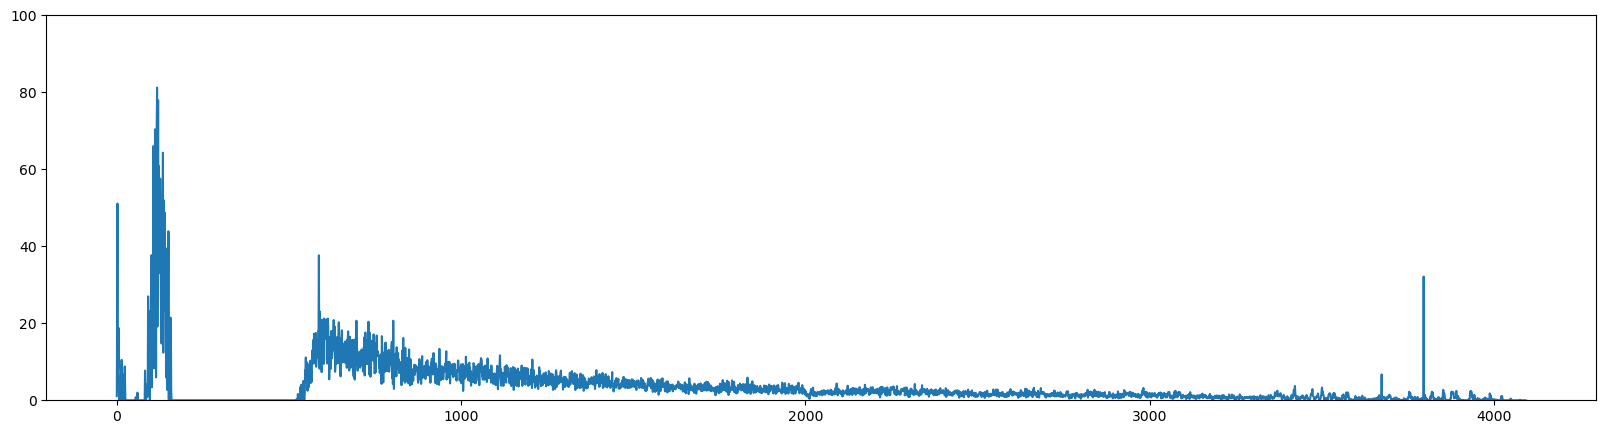

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

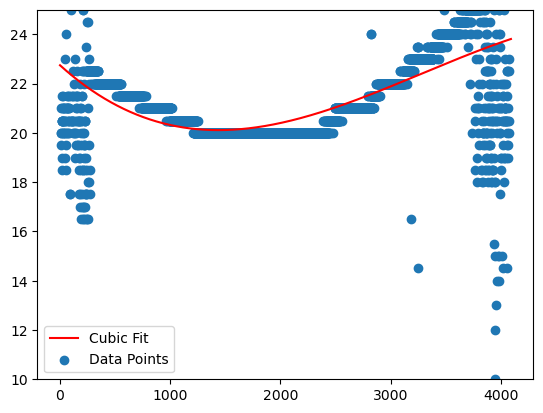

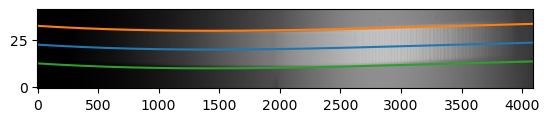

(42, 4094)


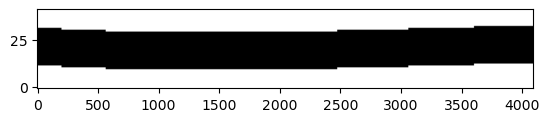

11 (42, 4094)


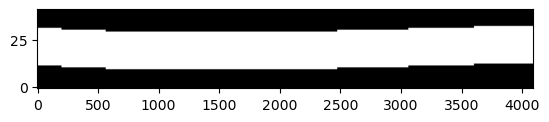

(42, 4094)
(42, 4094)


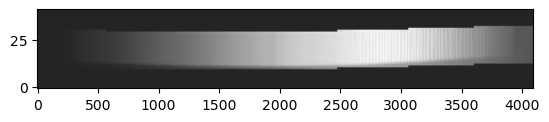

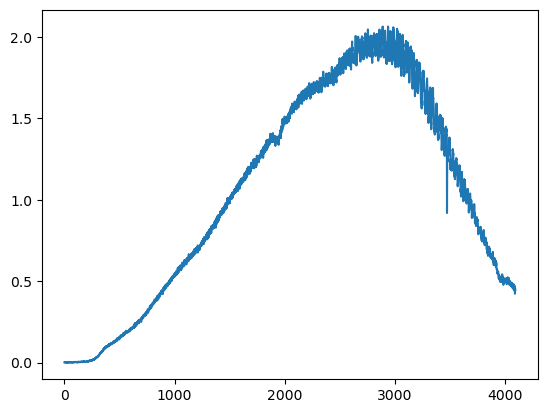

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


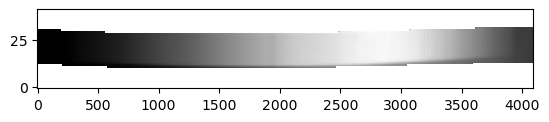

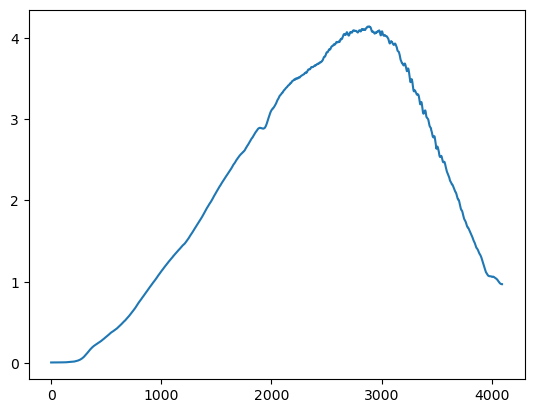

(42, 4094)
(42, 4094)


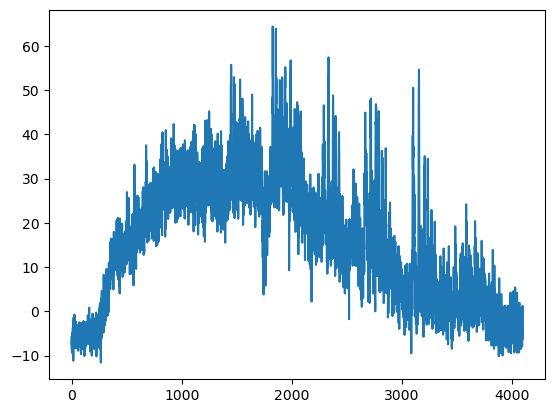

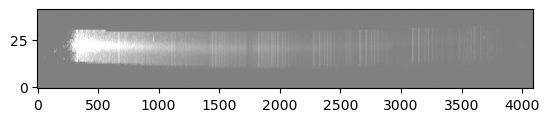

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.0298532   0.26980572
  4.66275986  3.98618272  5.47613864  5.238872    3.69067243  6.18165434
  6.37902127  9.99117745  9.11959243 11.67156577  8.94777738  9.30000508
  7.19127427  5.83341173  9.19952417  4.29835578  6.56259901  6.84712684
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


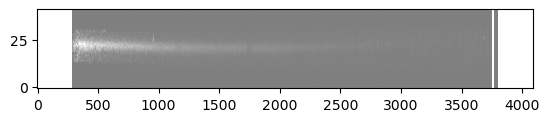

(84, 4094) (84, 4094)


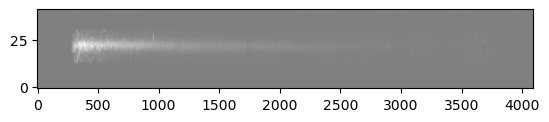

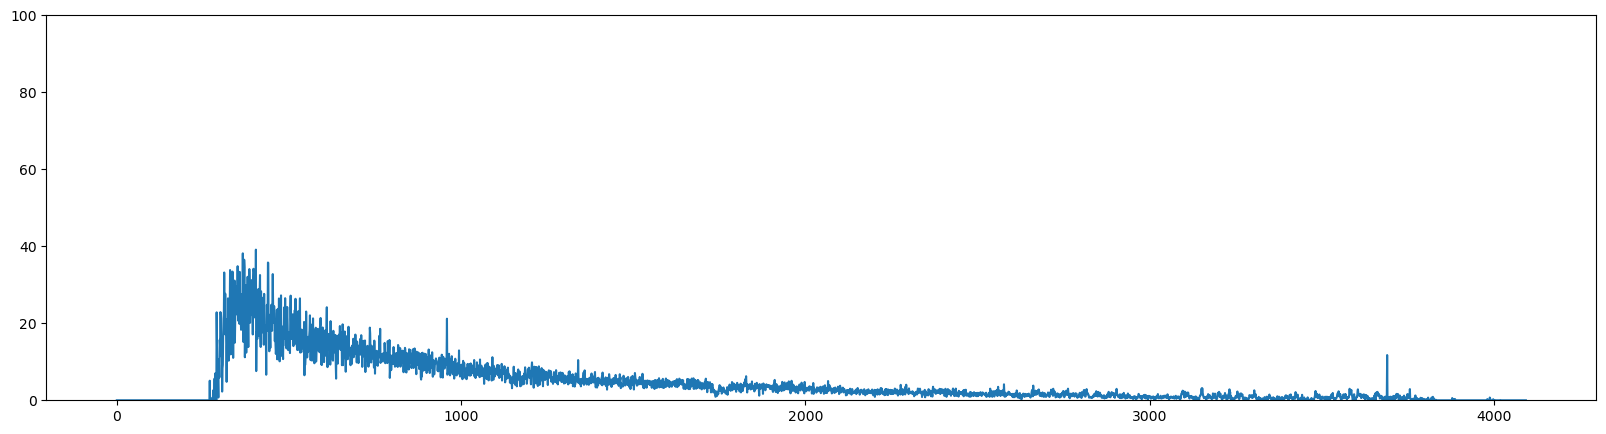

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

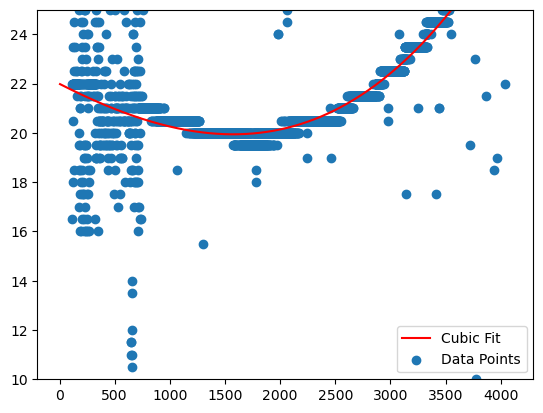

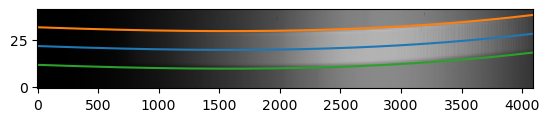

(42, 4094)


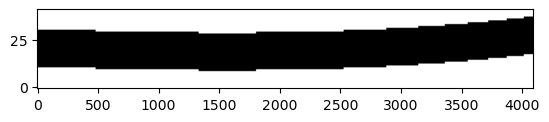

12 (42, 4094)


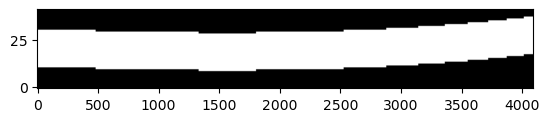

(42, 4094)
(42, 4094)


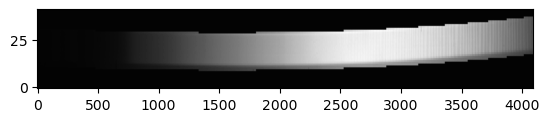

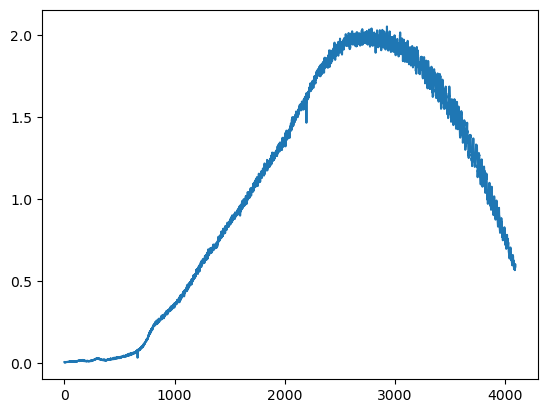

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


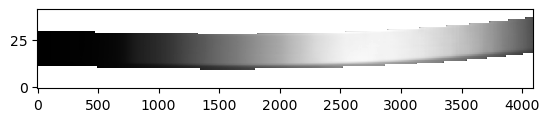

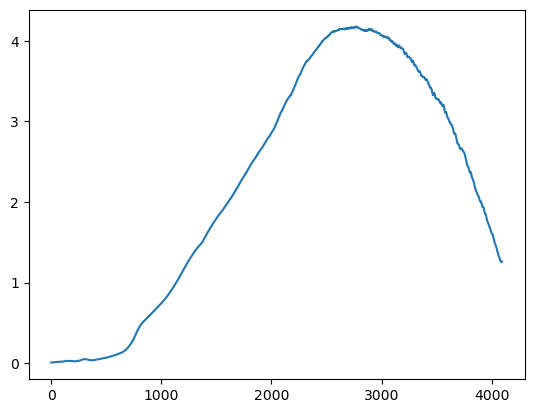

(42, 4094)
(42, 4094)


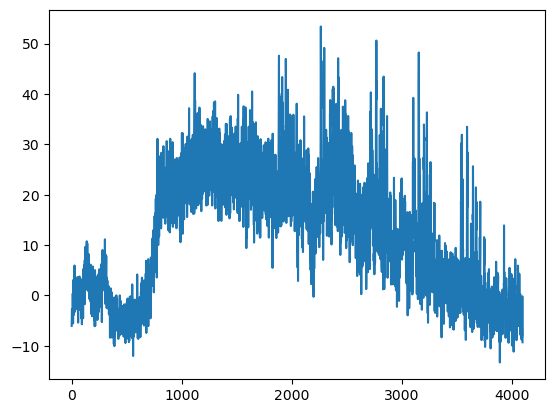

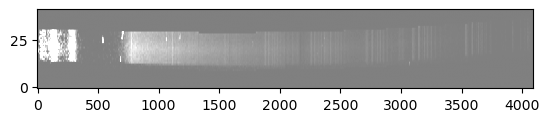

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.86043707 3.41501336
 0.75803188 5.4809029  3.15068534 4.97065828 6.41810268 4.9736482
 5.71313997 7.05800369 7.65389363 7.32698922 7.61947469 7.48796594
 7.05594805 1.44061296 5.34589421 5.19715239 4.43875037 4.78855999
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


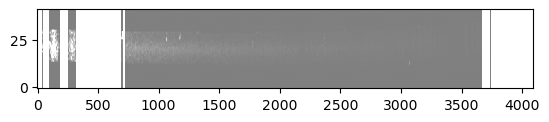

(84, 4094) (84, 4094)


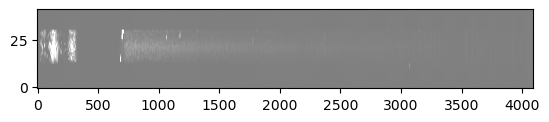

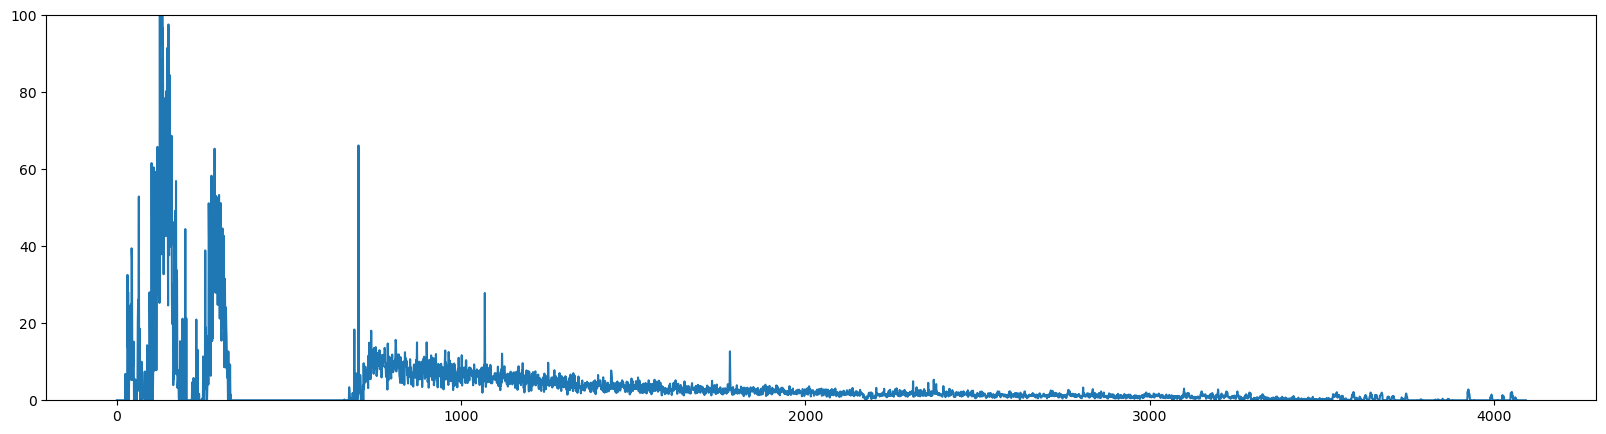

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

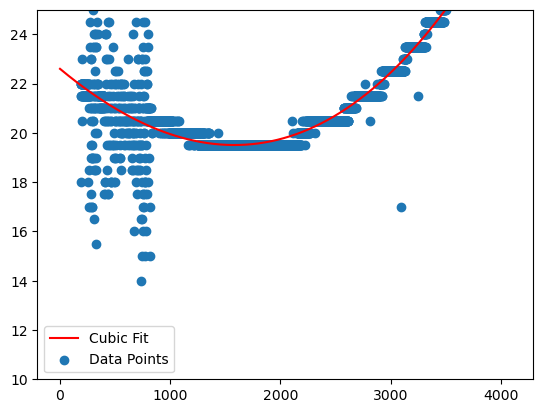

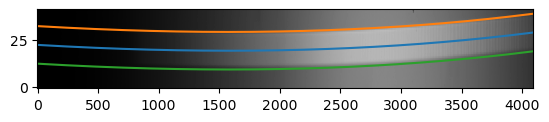

(42, 4094)


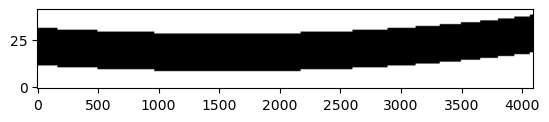

13 (42, 4094)


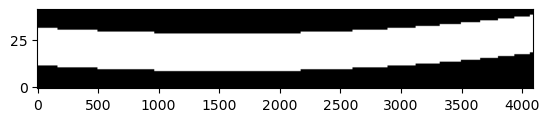

(42, 4094)
(42, 4094)


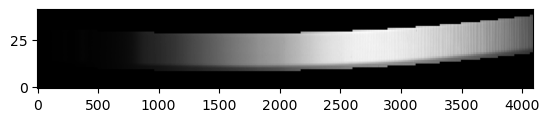

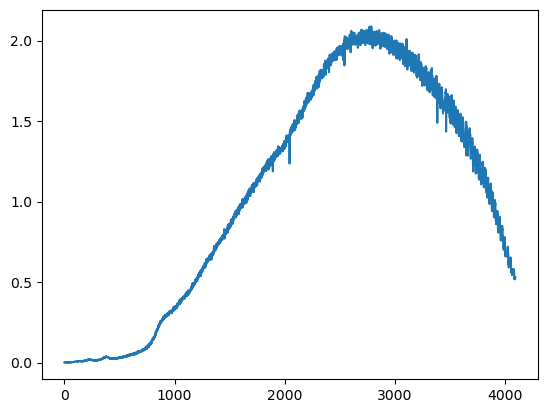

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


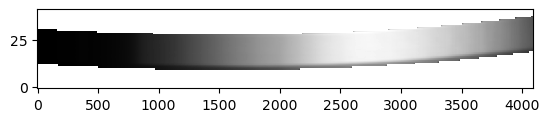

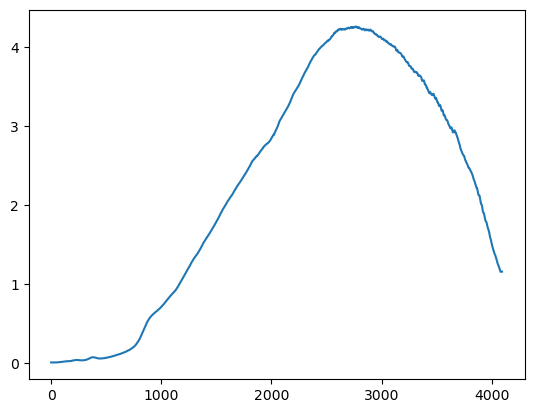

(42, 4094)
(42, 4094)


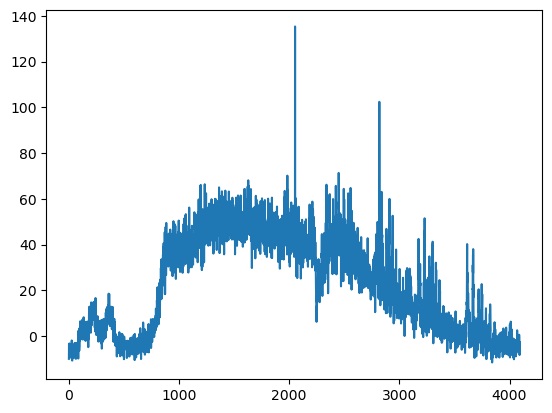

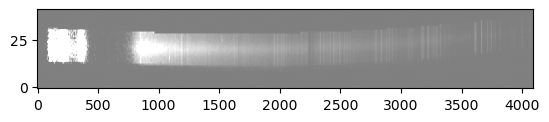

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.23990713  0.          4.37902207
  7.82460244  7.58804256  8.79386934  8.67337985  8.11209235  9.84152073
  9.33375832 15.08699682 12.36393464 16.33719834 13.43132436 12.21688508
 11.52579137 10.31397916  8.12071093  7.20298807  6.43446517  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nestrada/miniforge3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


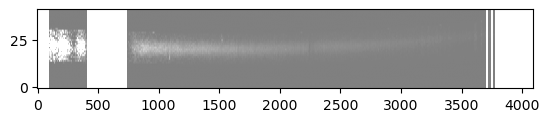

(84, 4094) (84, 4094)


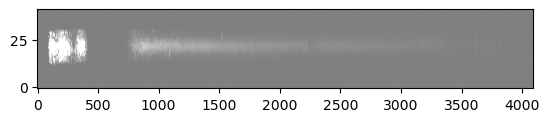

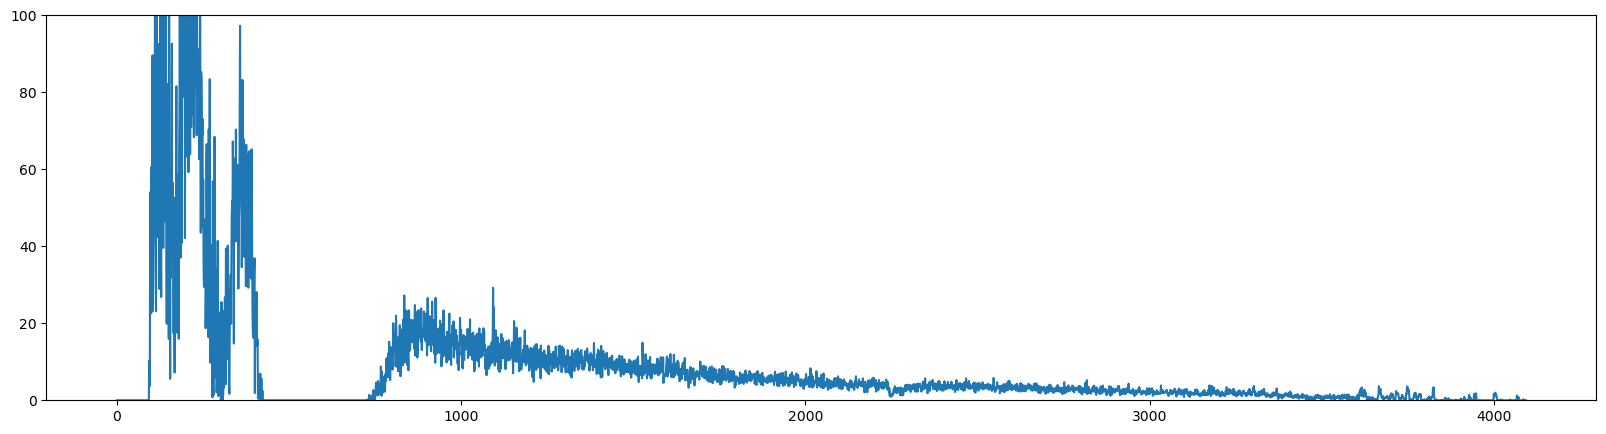

Filename: /Users/nestrada/Documents/SAMOS/Pipeline/Nicolas_01/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
  9  MASK          1 ImageHDU         8   (4094, 42)   float64   
 10  COEFFS        1 ImageHDU         7   (4,)   float64   
 11  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
 12  SPEC-2D       1 ImageHDU         8   (4094, 42)   float6

In [7]:
#READ THE FITS FILE
#====================================================================================
#fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
#fits_files = working_directory+'/spec_*.fits'.format(i_s=i_s)
#N_files = 

for i_s in range(14):

    #READ THE FITS FILE
    #====================================================================================
    fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
    
    hdul = fits.open(fits_file)
    hdr = hdul[0].header
    hdul.info()
    print(hdr)
    slits= [hdr['i0'], hdr['i1'], hdr['i2'], hdr['i3']]
    print(slits)
    data1 = hdul[1].data
    i_flat = hdul[2].data
    i_lines = hdul[3].data
#    mask_in  = hdul[4].data
#    curvature= hdul[5].data 
#    x = curvature[0][:]
#    px = curvature[1][:]
#    print(mask_in)
    #plt.imshow(mask_in, origin='lower', cmap='gray',aspect='15.5') 
    #plt.imshow(mask_in, origin='lower', cmap='gray',vmin=0, vmax=50,aspect='15.5') 
#    print(px[3000:3200])
#    mask_out = 1-mask_in
    dx = data1.shape[1] ; print(dx)
    dy = data1.shape[0] ; print(dy)

    #Find the curvature of the spectra
    #====================================================================================
    #then the logic is to scan the rectangular area in the x direction, 
    #looking for the edges of each column; 
    #if there is no edge, skip the column
    #if there are multiple edges, pick the maximum and minimum value
    #the procedure returns the central value between the extreme edges, i.e. the center of the trace.
    
    xpix=[]
    yctr=[]
    #flat_bias_blur = cv2.GaussianBlur(i_flat,(5,5), sigmaX=0, sigmaY=0)
    #print(i_flat.shape,flat_bias_blur.shape,np.max(i_flat),np.max(flat_bias_blur))
    
    for ix in range(dx):    
        v = i_flat[:,ix]
        #threshold = (max(v)-min(v))/5  
        edges=find_edges(v)
        if len(edges) == 0:
            continue
        e0 = edges[0]
        e1 = edges[-1]
        if e0 == 0:
            continue
    #    print(i,e0,e1,np.mean([e0,e1]))
        xpix.append(ix)
        yctr.append(np.mean([e0,e1]))
    print(len(yctr))
        #print(np.mean([e0,e1]))
    
    ilen = 0
    x_good = []
    #once you reach 
    for ix in range(5,len(yctr)-6,1):
        #print(ix, yctr[ix],np.std(yctr[ix:ix+10]))
        if np.std(yctr[ix+1:ix+50]) < 1  :# ==0:
            #print(np.std(yctr[ix:ix+10]))
            x_good.append(ix)
            #imin=ix
            #ilen+=1
    #        if ilen == 50:
    #            break
    imin = min(x_good)
    imax = max(x_good)
    print('imin=',imin,imax,len(x_good))
    """
    ilen=0
    for ix in range(dx,imin,-1):
    #    print(ix,np.isnan(np.std(yctr[ix:ix+100])))
        if np.std(yctr[ix-1:ix-10]) <1  or np.isnan(np.std(yctr[ix:ix-100])) == True:
    #        print(ix)
            imax=ix
            ilen+=1
            if ilen == 50:
                break
    print(imin,imax)
    """
    #print(np.std(yctr[i:i+100]))
        
    #next we fit a polynomial, 3rd degree, to the array of centers
    coefficients = np.polyfit(xpix[imin:imax], yctr[imin:imax], 3)
    # Create polynomial function
    p = np.poly1d(coefficients)
    
    #plot to check....
    plt.ylim(10,25)
    plt.scatter(xpix[imin:imax], yctr[imin:imax], label='Data Points')
    plt.plot(xpix, p(xpix), label='Cubic Fit', color='red')
    plt.legend()
    plt.show()
    
    # but basically we have the trace.
    #Show it with an overlay on the image
    
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(i_flat, origin='lower', cmap='gray',vmin=0, vmax=20000,aspect='15.5')
    
    #ax.imshow(flat_bias_blur[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=0, vmax=20000,aspect='15.5')
    #print(slits[i_slit],arc_good[slits[i_slit][0]:slits[i_slit][3],:].shape)
    
    #Display the center trace
    x=np.arange(dx)
    plt.plot(x, p(x))
    #and the edges
    below = slits[1] - slits[0]-2
    above = slits[3] - slits[2]-2
    plt.plot(x, p(x)+above)
    plt.plot(x, p(x)-below)
    plt.show()
    # Plot the vector
    
    #print('\n',i_slit,flat_bias_blur[slits[i_slit][0]:slits[i_slit][3],:].shape)
    
    #display_imageslits[i_slit][1]#:i_slit[0][1],1000:1100]    

    # CREATE THE TWO BINARY MASKS: Illuminated vs. non-illuminated
    #====================================================================================
    mask_in = i_flat * 0
    mask_out = i_flat * 0
    print(mask_in.shape)
    
    for ix in range(dx):
        mask_out[0:int(p(ix)-below),ix]  = 1
        mask_out[int(p(ix)+above):,ix]  = 1
    plt.imshow(mask_out, origin='lower', cmap='gray',aspect='15.5') 
    plt.show()
    
    mask_in = 1-mask_out
    plt.imshow(mask_in, origin='lower', cmap='gray',aspect='15.5') 
    print(i_s,mask_in.shape)
    plt.show()
    print(mask_in.shape)
    
    #Extract the FLATS
    #====================================================================================
    i_flat_bck = i_flat * mask_out
    i_flat_slit = i_flat * mask_in
    print(i_flat_slit.shape)
    for ix in range(dx):
        i_flat_slit[:,ix] = i_flat_slit[:,ix] - np.mean(i_flat_bck[:,ix])
    i_flat_slit *= mask_in   
    i_flat_slit = i_flat_slit/np.mean(i_flat_slit[i_flat_slit != 0])
    plt.imshow(i_flat_slit, origin='lower', cmap='gray',aspect='15.5') 
    plt.show()
    plt.plot(i_flat_slit[20,:])
    plt.show()
    print(i_flat_slit.shape)
    
    #Creating a kernel for numpy 
    #====================================================================================
    kernel2 = np.ones((1, 50), np.float32)/50
    print(i_flat_slit.shape)  
    
    # Applying the filter 
    #====================================================================================
    i_flat_slit_smooth = cv2.filter2D(src=i_flat_slit, ddepth=-1, kernel=kernel2) 
    print(i_flat_slit.shape,i_flat_slit_smooth.shape)
    
    #flat_slit_smooth *= mask_in   
    #====================================================================================
    i_flat_slit_smooth = i_flat_slit_smooth/np.mean(i_flat_slit_smooth[i_flat_slit_smooth != 0])
    i_flat_slit_smooth *= mask_in
    i_flat_slit_smooth[i_flat_slit_smooth ==  0] = np.nan
    plt.imshow(i_flat_slit_smooth, origin='lower', cmap='gray',aspect='15.5') 
    plt.show()
    plt.plot(i_flat_slit_smooth[20,:])
    plt.show()
    print(i_flat_slit_smooth.shape)
    
    
    #flat field the image
    #====================================================================================
    i_spectra_slit  = data1 * mask_in
    i_spectra_bck = data1 * mask_out
    for ix in range(dx):
        i_spectra_slit[:,ix] = i_spectra_slit[:,ix] - np.mean(i_spectra_bck[:,ix])
    i_spectra_slit *= mask_in   
    print(i_spectra_slit.shape)
    
    plt.plot(i_spectra_slit[20,:])
    plt.show()
    i_spectra_slit_ff = i_spectra_slit / i_flat_slit_smooth
    i_spectra_slit_ff = np.nan_to_num(i_spectra_slit_ff,posinf=0, neginf=0)
    i_spectra_slit_ff[i_spectra_slit_ff<0]=0
    #print(spectra_slit_ff)
    plt.imshow(i_spectra_slit_ff*mask_in, origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    plt.show()
    print(i_spectra_slit_ff[:,2000])
    
    #subtract the sky
    #====================================================================================
    i_spectra_slit_ff_OH = copy.deepcopy(i_spectra_slit_ff)
    for ix in range(dx):#2000,2001):
    #for ix in range(2000,2001):
    
        #print(ix)
        v=i_spectra_slit_ff_OH[:,ix]
        #print(v)
        v=v[v != 0]
        #print(v)
        vs = np.sort(v)
        #print('\nvs = ',vs[1:8])
        mmm = np.median(vs[3:8])
        #print(mmm)
        i_spectra_slit_ff_OH[:,ix] = i_spectra_slit_ff[:,ix] - mmm
        i_spectra_slit_ff_OH[i_spectra_slit_ff_OH<0]=0    
    #print(spectra_slit_ff_rect_OH[:,i])
    plt.imshow(i_spectra_slit_ff_OH,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    plt.show()
    #plt.plot(i_spectra_slit_ff_OH[25,:])
    
    
    #plt.plot(i_spectra_slit_ff_rect[14,2000:3000]-i_spectra_slit_ff_rect[26,2000:3000])
    
    #plt.plot(i_spectra_slit_ff_rect[14,2000:3000]-i_spectra_slit_ff_rect[26,2000:3000])
    
    #rectify the spectrum
    #====================================================================================
    import scipy.ndimage
    hy  = i_spectra_slit_ff_OH.shape[0]
    hx  = i_spectra_slit_ff_OH.shape[1]
    order=2
    i0 = np.zeros([hy*order,hx])  #out resampled 
    #print(i0.shape,np.isnan(np.min(i0)))
    #plt.imshow(i0,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    
    i1 = scipy.ndimage.zoom(i_spectra_slit_ff_OH, (order,1), order=1) #input resampled
    i1=np.nan_to_num(i1, nan=0.0)
    #print(i1.shape,np.isnan(np.min(i01)))
    #plt.imshow(i1,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    #plt.show()
    
    i1[i1<0]=0
    #plt.imshow(i1,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    #plt.show()
    print(i0.shape,i1.shape)
    from scipy import signal
    for ix in range(dx):
        f = signal.resample(i_spectra_slit_ff_OH[:,ix], hy*order)
        i0[:,ix] = np.roll( i1[:,ix],-int(order*p(ix))+21*order)#hy/2*order))        
    
    i_spectra_slit_ff_OH_rect = scipy.ndimage.zoom(i0, (1/order,1), order=order)
    plt.imshow(i_spectra_slit_ff_OH_rect,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    plt.show()
    i_spectra_slit_ff_OH_rect[i_spectra_slit_ff_OH_rect<0.01]=0
    (slits[1]+slits[2])/2-slits[1]
    #print(i_spectra_slit_ff_OH_rect[:,2000])
    
    #Look at the 1-d spectrum
    #====================================================================================
    i_spectrum_1d = i_spectra_slit_ff_OH_rect[17:27,:].mean(axis=0)
    plt.figure(figsize=(20,5))
    plt.ylim([0,100])
    plt.plot(i_spectrum_1d) 
    plt.show()
    
    
    #CREATE FITS DATACUBE
    #====================================================================================
    fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
    hdulist = fits.open(fits_file)

        #add mask
    mask_hdu = fits.ImageHDU(data=mask_in, name= "MASK")
    hdulist.append(mask_hdu)
    #add coefficients
    coefficients_hdu = fits.ImageHDU(data=coefficients, name= "coeffs")
    hdulist.append(coefficients_hdu)
    #add curvature
    curvature = [x,p(x)]
    mask_hdu = fits.ImageHDU(data=[x,p(x)], name= "curvature")
    hdulist.append(mask_hdu)
    #add 2d spectrum
    final2d_hdu = fits.ImageHDU(data=i_spectra_slit_ff_OH_rect, name= "SPEC-2d")
    hdulist.append(final2d_hdu)
    #add 1d spectrum
    spec1d = [x,i_spectrum_1d]
    final1d_hdu = fits.ImageHDU(data=spec1d, name= "SPEC-1d")
    hdulist.append(final1d_hdu)
    
    hdulist.info()
    hdulist.writeto(working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s),overwrite=True)
    hdulist.close()
    